### Import necessary libraries

In [57]:
# Import Libraries for analysis and visualisation
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

#import libraries for ML-Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import  MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import ExtraTreesRegressor
import pickle

## Library of warnings would assist in ignoring warnings issued
import warnings
warnings.filterwarnings("ignore")

### Dataset loading

In [2]:
#loading csv file using pandas dataframe
data = pd.read_csv('data.csv')

In [3]:
# # Viewing the top 5 rows to take a glimpse of the data
data.head()

timestamp equipment_energy_consumption     lighting_energy  \
0  2016-01-11 17:00:00                         60.0  -77.78778596503064   
1  2016-01-11 17:10:00                         60.0                30.0   
2  2016-01-11 17:20:00                         50.0                30.0   
3  2016-01-11 17:30:00                         50.0                40.0   
4  2016-01-11 17:40:00                         60.0                40.0   

   zone1_temperature     zone1_humidity zone2_temperature  zone2_humidity  \
0  33.74660933896648  47.59666666666671              19.2       44.790000   
1              19.89  46.69333333333329              19.2       44.722500   
2              19.89               46.3              19.2       44.626667   
3  33.74660933896648   46.0666666666667              19.2       44.590000   
4              19.89  46.33333333333329              19.2       44.530000   

   zone3_temperature  zone3_humidity  zone4_temperature  ...  \
0              19.79             NaN          19.000000  ...   
1              19.79       44.790000          19.000000  ...   
2              19.79       44.933333          35.921144  ...   
3              19.79       45.000000                NaN  ...   
4              19.79       45.000000          18.890000  ...   

   zone9_temperature  zone9_humidity  outdoor_temperature  \
0          17.033333           45.53             6.600000   
1          17.066667           45.56             6.483333   
2          17.000000           45.50             6.366667   
3          17.000000           45.40             6.250000   
4           4.476511           45.40             6.133333   

   atmospheric_pressure  outdoor_humidity  wind_speed  visibility_index  \
0                 733.5              92.0    7.000000         63.000000   
1                 733.6              92.0    6.666667         59.166667   
2                 733.7              92.0    6.333333         55.333333   
3                 733.8              92.0    6.000000         51.500000   
4                 733.9              92.0    5.666667         47.666667   

   dew_point  random_variable1  random_variable2  
0   5.300000         13.275433         13.275433  
1   5.200000         18.606195         18.606195  
2   5.100000         28.642668         28.642668  
3  37.673716         45.410389         45.410389  
4   4.900000         10.084097         10.084097  

[5 rows x 29 columns]

In [4]:
data.columns

Index(['timestamp', 'equipment_energy_consumption', 'lighting_energy',
       'zone1_temperature', 'zone1_humidity', 'zone2_temperature',
       'zone2_humidity', 'zone3_temperature', 'zone3_humidity',
       'zone4_temperature', 'zone4_humidity', 'zone5_temperature',
       'zone5_humidity', 'zone6_temperature', 'zone6_humidity',
       'zone7_temperature', 'zone7_humidity', 'zone8_temperature',
       'zone8_humidity', 'zone9_temperature', 'zone9_humidity',
       'outdoor_temperature', 'atmospheric_pressure', 'outdoor_humidity',
       'wind_speed', 'visibility_index', 'dew_point', 'random_variable1',
       'random_variable2'],
      dtype='object')

In [5]:
# Dataset Rows & Columns count
data.shape

(16857, 29)

In [6]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   timestamp                     16857 non-null  object 
 1   equipment_energy_consumption  16013 non-null  object 
 2   lighting_energy               16048 non-null  object 
 3   zone1_temperature             15990 non-null  object 
 4   zone1_humidity                16056 non-null  object 
 5   zone2_temperature             16004 non-null  object 
 6   zone2_humidity                15990 non-null  float64
 7   zone3_temperature             16055 non-null  float64
 8   zone3_humidity                15979 non-null  float64
 9   zone4_temperature             16041 non-null  float64
 10  zone4_humidity                16076 non-null  float64
 11  zone5_temperature             16019 non-null  float64
 12  zone5_humidity                16056 non-null  float64
 13  z

In [7]:
# Changing the data format of date column
data['timestamp'] = pd.to_datetime(data['timestamp'], errors='coerce')

# Changing the object columns of data to numerical
for col in data.columns:
    if data[col].dtype == 'object' and col != 'timestamp':
        data[col] = pd.to_numeric(data[col], errors='coerce')

In [8]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   timestamp                     16857 non-null  datetime64[ns]
 1   equipment_energy_consumption  15945 non-null  float64       
 2   lighting_energy               15993 non-null  float64       
 3   zone1_temperature             15908 non-null  float64       
 4   zone1_humidity                15969 non-null  float64       
 5   zone2_temperature             15934 non-null  float64       
 6   zone2_humidity                15990 non-null  float64       
 7   zone3_temperature             16055 non-null  float64       
 8   zone3_humidity                15979 non-null  float64       
 9   zone4_temperature             16041 non-null  float64       
 10  zone4_humidity                16076 non-null  float64       
 11  zone5_temperature           

In [9]:
#Columns which contain negative values.
negative_columns = data.drop(columns=['timestamp']).columns[(data.drop(columns=['timestamp']) < 0).any()]
print("Columns with negative values (excluding timestamp):", negative_columns)

Columns with negative values (excluding timestamp): Index(['equipment_energy_consumption', 'lighting_energy', 'zone1_humidity',
       'zone2_humidity', 'zone3_humidity', 'zone4_humidity', 'zone5_humidity',
       'zone6_temperature', 'zone6_humidity', 'zone7_humidity',
       'zone8_humidity', 'zone9_humidity', 'outdoor_temperature',
       'outdoor_humidity', 'wind_speed', 'visibility_index', 'dew_point',
       'random_variable1', 'random_variable2'],
      dtype='object')


In [10]:
#Dropping remaining values other than positive values of target since energy value always > 0.
data = data[data['equipment_energy_consumption'] >= 0]

#energy, humidity, wind_speed, visibility_index cannot be negative
invalid_negative_columns = ['lighting_energy', 'zone1_humidity',
       'zone2_humidity', 'zone3_humidity', 'zone4_humidity', 'zone5_humidity', 'zone6_humidity', 'zone7_humidity',
       'zone8_humidity', 'zone9_humidity', 'outdoor_humidity', 'wind_speed', 'visibility_index']
data[invalid_negative_columns] = data[invalid_negative_columns].applymap(lambda x: np.nan if x < 0 else x)

In [11]:
# Missing Values/Null Values Count
data.isnull().sum()

timestamp                          0
equipment_energy_consumption       0
lighting_energy                 1003
zone1_temperature                874
zone1_humidity                   966
zone2_temperature                858
zone2_humidity                   932
zone3_temperature                745
zone3_humidity                   985
zone4_temperature                758
zone4_humidity                  1037
zone5_temperature                771
zone5_humidity                  1014
zone6_temperature                787
zone6_humidity                  1061
zone7_temperature                721
zone7_humidity                  1080
zone8_temperature                786
zone8_humidity                  1034
zone9_temperature                711
zone9_humidity                   989
outdoor_temperature              750
atmospheric_pressure             782
outdoor_humidity                1019
wind_speed                       925
visibility_index                 920
dew_point                        750
r

### What did you know about your dataset?

* The dataset provided contains 29 columns and 16857 rows.

* The goal is to predict equipment_energy_consumption. Demand prediction involves analytical studies on the temperature and humidity conditions, which were monitored with a sensor for 10 minutes in 9 zones.

* The data has null values. These null values will be handled in the next steps.

In [12]:
#Getting the months, days, hours, minutes from date
data['hour'] = data['timestamp'].dt.hour
data['minute'] = data['timestamp'].dt.minute
data['day'] = data['timestamp'].dt.day
data['weekday'] = data['timestamp'].dt.weekday  # Monday=0, Sunday=6
data['month'] = data['timestamp'].dt.month


# Droping the original timestamp column
data.drop(columns=['timestamp'], inplace=True)

In [13]:
# Dataset Describe
data.describe().T

count        mean         std         min  \
equipment_energy_consumption  15631.0  108.584711  148.628836   10.000000   
lighting_energy               14628.0    4.917040   11.673091    0.000000   
zone1_temperature             14757.0   21.250548    2.174095    8.726818   
zone1_humidity                14665.0   39.816054    6.318229    3.348060   
zone2_temperature             14773.0   19.804462    2.950696    2.988199   
zone2_humidity                14699.0   40.200901    6.725194    3.193842   
zone3_temperature             14886.0   21.669488    2.603906    6.543921   
zone3_humidity                14646.0   39.120236    5.410238    6.902515   
zone4_temperature             14873.0   20.238371    2.803067    4.613485   
zone4_humidity                14594.0   39.172561    6.201609   27.660000   
zone5_temperature             14860.0   19.053025    2.348941    5.921094   
zone5_humidity                14617.0   52.178820   13.315842   35.363333   
zone6_temperature             14844.0    6.500785    8.827877  -42.987365   
zone6_humidity                14570.0   63.247694   41.875060    1.000000   
zone7_temperature             14910.0   19.674931    2.898436    3.578021   
zone7_humidity                14551.0   35.338449    6.879929   23.200000   
zone8_temperature             14845.0   21.608570    2.976472    4.502372   
zone8_humidity                14597.0   43.225426    7.443920   29.600000   
zone9_temperature             14920.0   18.856050    2.517298    4.476511   
zone9_humidity                14642.0   41.231660    6.941179    0.918228   
outdoor_temperature           14881.0    6.223465    7.645203  -37.524768   
atmospheric_pressure          14849.0  755.771476   13.695079  678.159940   
outdoor_humidity              14612.0   81.932698   19.195633   28.000000   
wind_speed                    14706.0    4.456960    3.573143    0.000000   
visibility_index              14711.0   39.824528   17.069538    1.000000   
dew_point                     14881.0    2.771432    6.047731  -32.098095   
random_variable1              14858.0   24.824855   26.269840 -120.170177   
random_variable2              14867.0   25.146877   25.574001 -120.409590   
hour                          15631.0   11.489796    6.935283    0.000000   
minute                        15631.0   25.006078   17.102256    0.000000   
day                           15631.0   15.853880    8.801908    1.000000   
weekday                       15631.0    2.982343    1.982539    0.000000   
month                         15631.0    2.774231    1.178889    1.000000   

                                     25%         50%         75%          max  
equipment_energy_consumption   50.000000   60.000000  100.000000  1139.985693  
lighting_energy                 0.000000    0.000000   10.000000    86.002966  
zone1_temperature              20.500000   21.356667   22.100000    33.746609  
zone1_humidity                 37.090000   39.290000   42.530000    76.292756  
zone2_temperature              18.600000   19.600000   20.790000    36.552882  
zone2_humidity                 37.826667   40.333333   43.000000    77.265503  
zone3_temperature              20.533333   21.790000   22.763333    36.823982  
zone3_humidity                 36.700000   38.400000   41.500000    71.406273  
zone4_temperature              19.263333   20.290000   21.375714    35.921144  
zone4_humidity                 35.290000   38.200000   41.700000    81.446225  
zone5_temperature              18.066667   19.071825   20.100000    32.157594  
zone5_humidity                 45.500000   49.000000   54.025714   141.640143  
zone6_temperature               2.929167    6.263333    9.690000    55.932271  
zone6_humidity                 38.966875   63.828333   86.900000   353.393026  
zone7_temperature              18.500000   19.600000   21.000000    35.712952  
zone7_humidity                 31.200000   34.378000   38.230000    84.882898  
zone8_temperature              20.500000   21.790000 

### What all manipulations have you done and insights you found?

1. Splitting date columns into hour,weekdays, months.
2. It will help in analysing the data on the bases of months, days and hours.
3. Dropped date column due to no further use of thety.


## Exploratory Data Analysis

<Axes: >

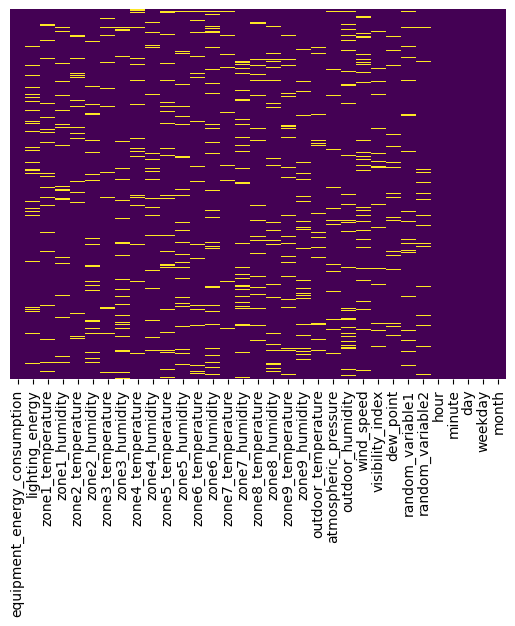

In [14]:
# Visualizing the missing values
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### 1. Why did you pick the specific chart?

* The reason for using heatmap is that missing values are clearly highlighted, making it easy to spot which features or rows are affected.

* It scales well even with many features and thousands of rows.

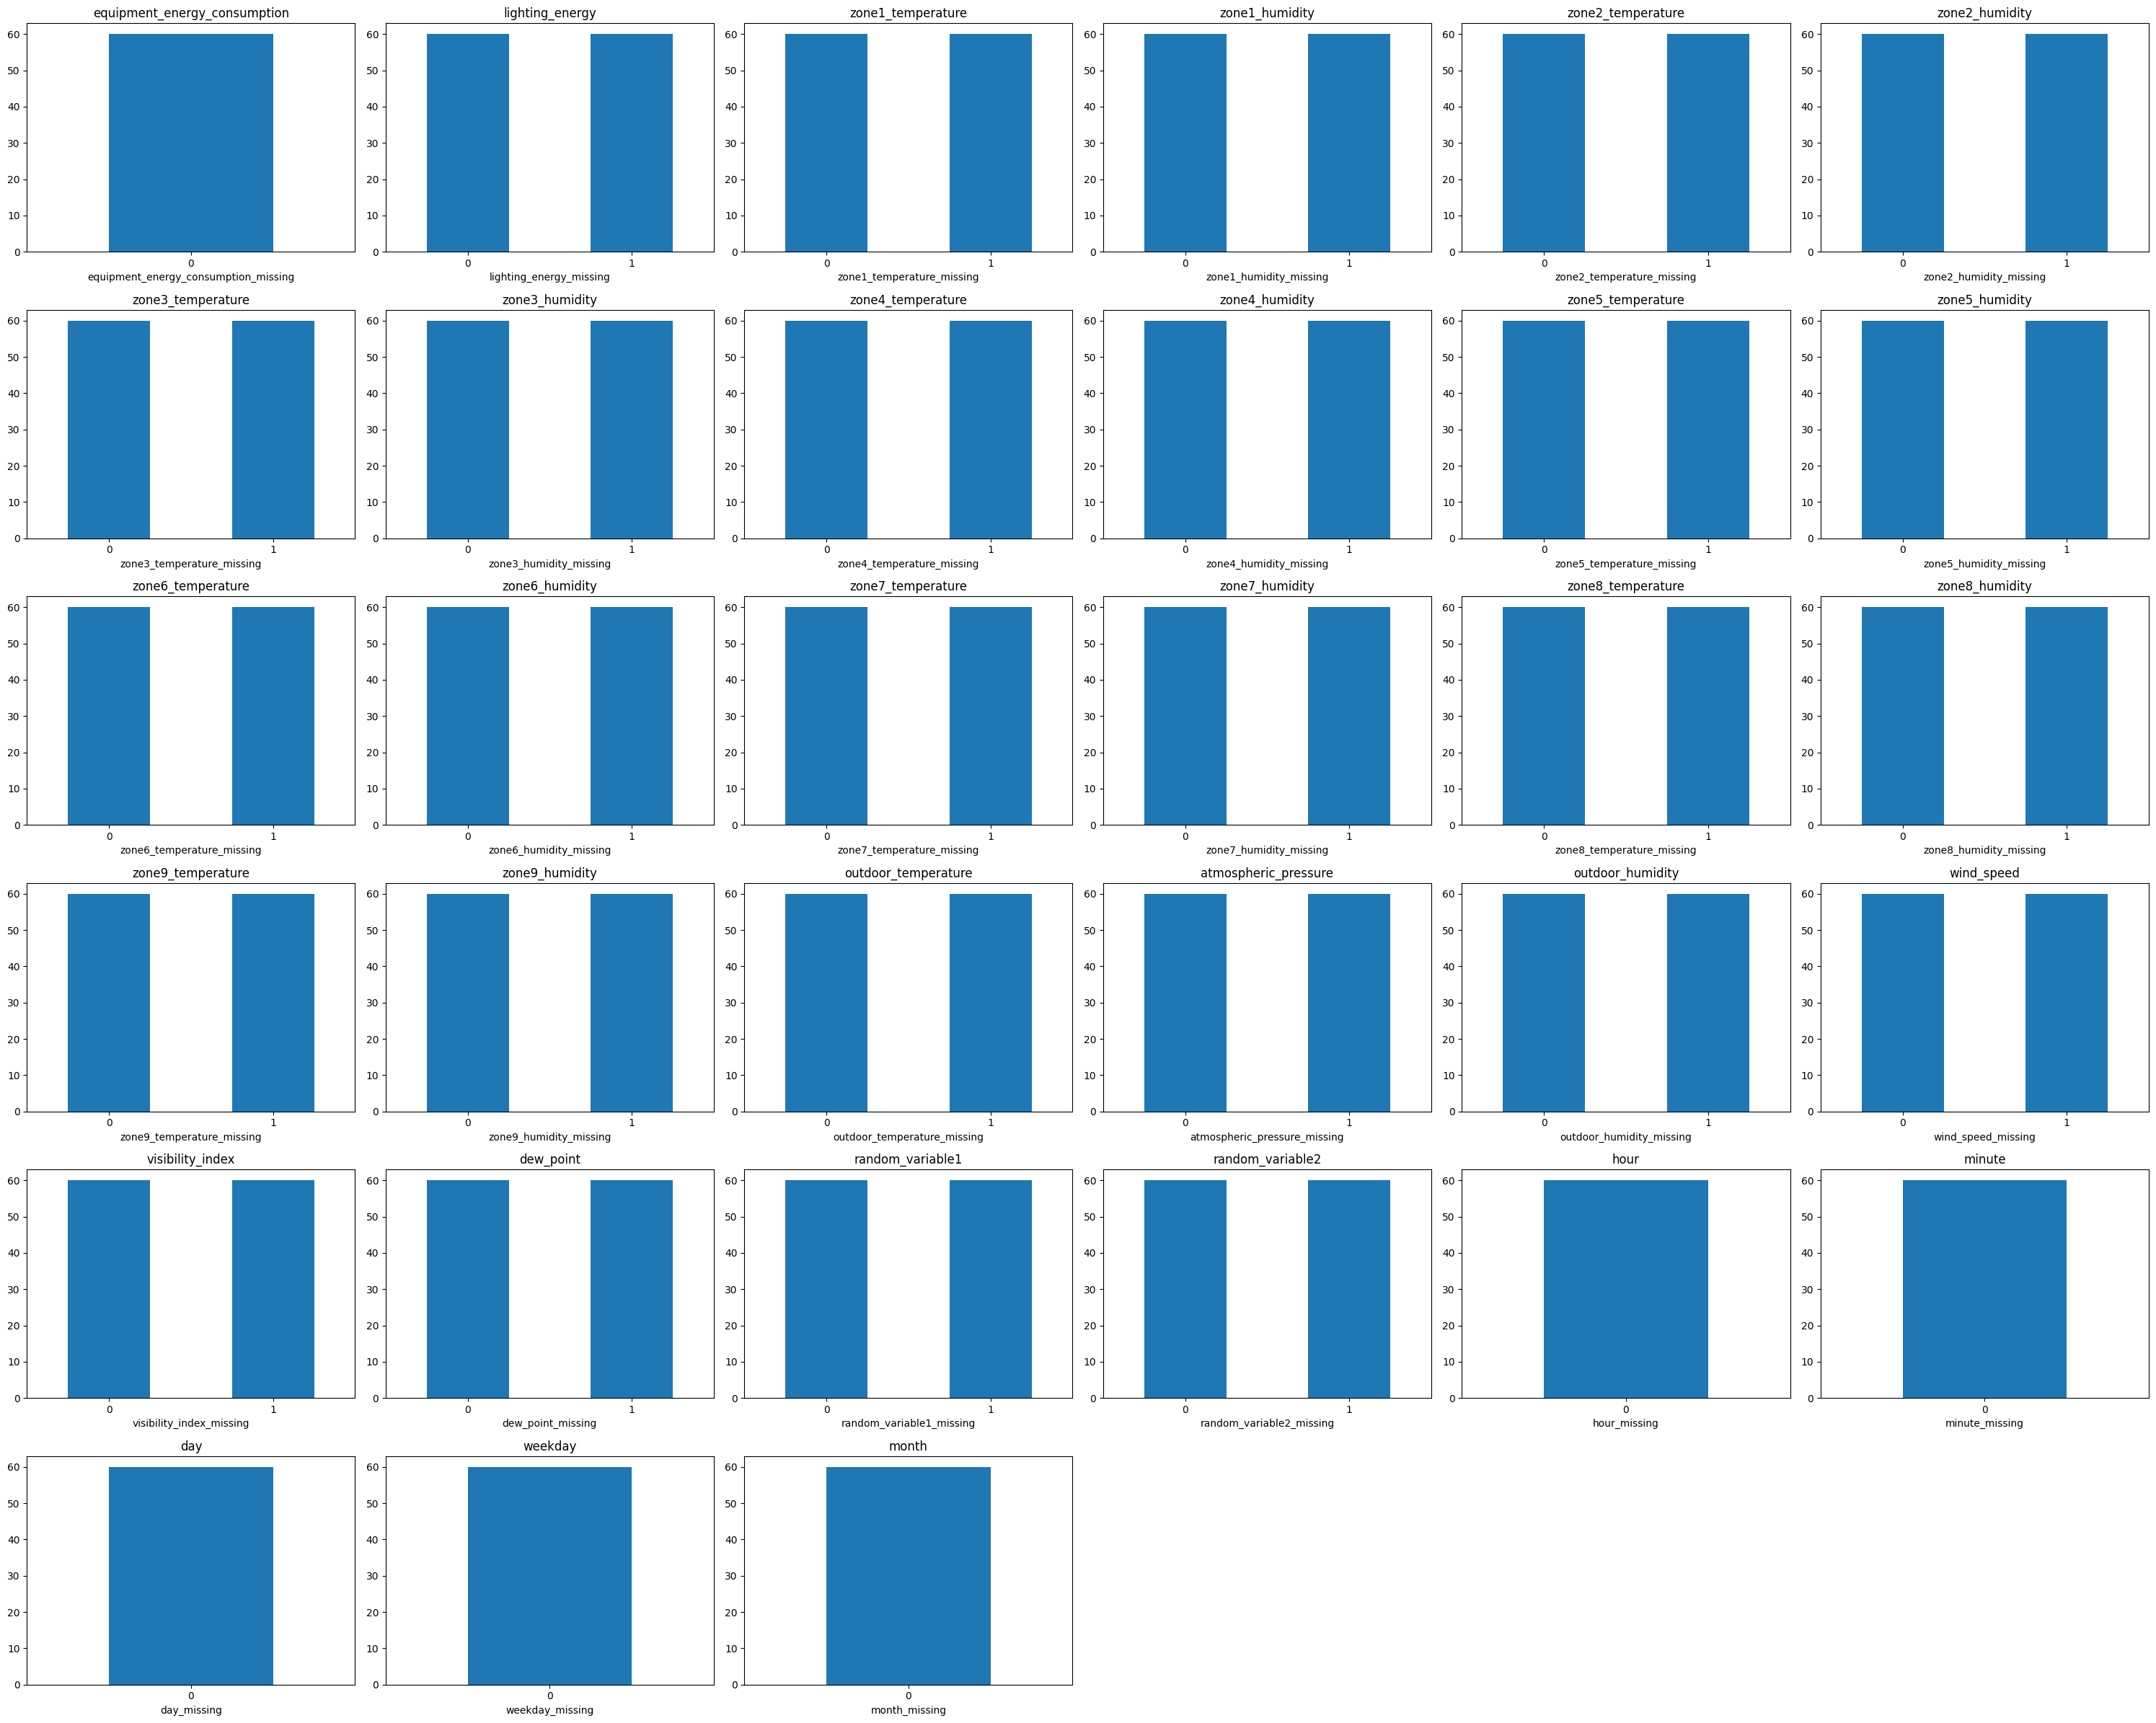

In [15]:
# Filter features that might have missing values
features = data.columns
num_features = len(features)
cols = 6  # number of columns in the subplot grid
rows = math.ceil(num_features / cols)

plt.figure(figsize=(cols * 5, rows * 4))

for i, feature in enumerate(features, 1):
    dataset = data.copy()
    # Create a binary indicator for missing values
    dataset[feature + '_missing'] = np.where(dataset[feature].isnull(), 1, 0)
    
    # Group by this indicator and plot median of target
    plt.subplot(rows, cols, i)
    dataset.groupby(feature + '_missing')['equipment_energy_consumption'].median().plot(kind='bar')
    plt.title(feature)
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


### 1. Why did you pick the specific chart?

* You can quantify how missingness might correlate with the outcome.

* It immediately tells you if missingness affects the target


### 2. What is/are the insight(s) found from the chart?

* Since there’s no significant difference in the median target values for missing vs non-missing values, you can proceed with handling the missing values normally.

<Axes: xlabel='hour', ylabel='equipment_energy_consumption'>

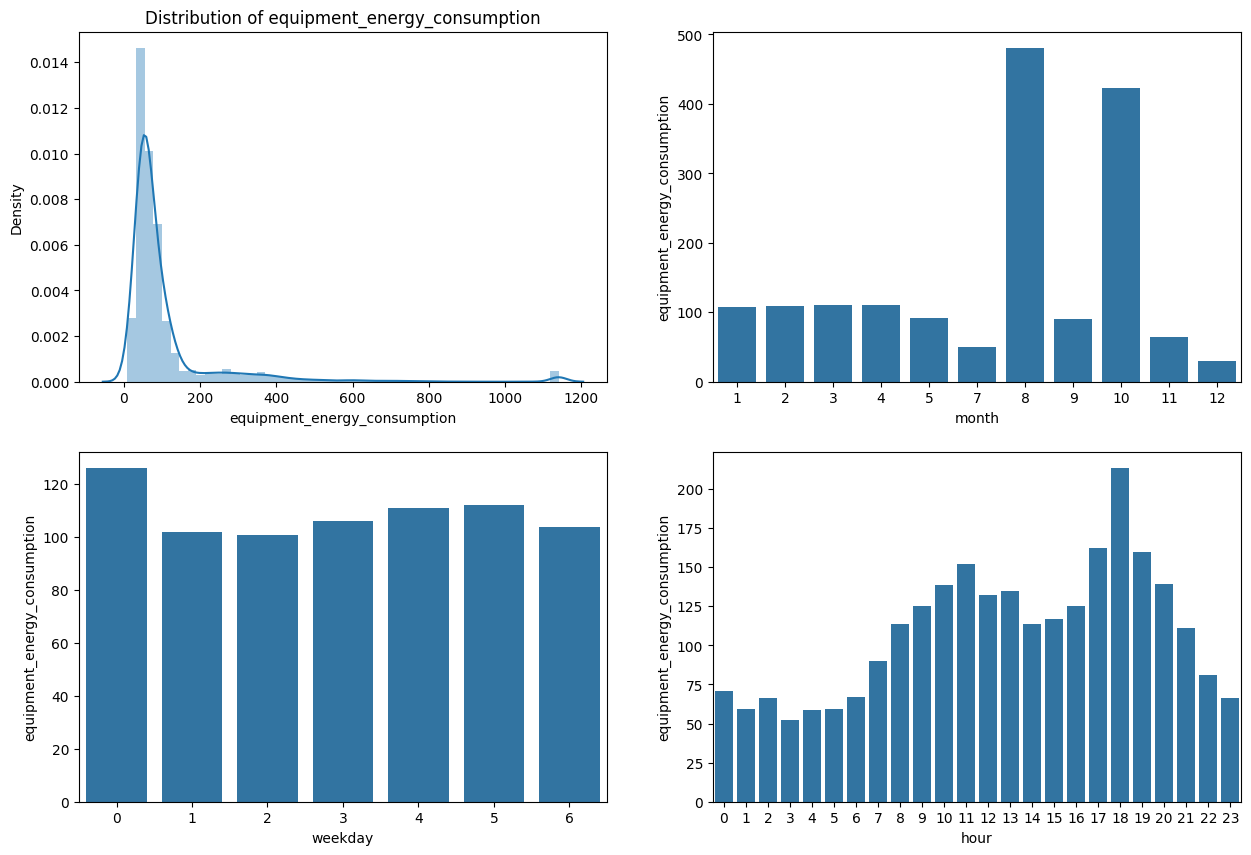

In [16]:
fig,ax=plt.subplots(2,2,figsize=(15,10))

#Distribution of Appliances
dist=sns.distplot(data['equipment_energy_consumption'],ax=ax[0,0])
dist.set_title('Distribution of equipment_energy_consumption')

#Average Appliances Energy over a month
month_eng = pd.DataFrame(data.groupby('month')['equipment_energy_consumption'].mean()).reset_index()
sns.barplot(x=month_eng['month'],y=month_eng['equipment_energy_consumption'], ax=ax[0,1])

#Average Appliances Energy over weekdays
weekday_eng=pd.DataFrame(data.groupby('weekday')['equipment_energy_consumption'].mean()).reset_index()
sns.barplot(x=weekday_eng['weekday'],y=weekday_eng['equipment_energy_consumption'],ax=ax[1,0])
#Average Appliances Energy over hours
hour_eng=pd.DataFrame(data.groupby('hour')['equipment_energy_consumption'].mean()).reset_index()
sns.barplot(x=hour_eng['hour'],y=hour_eng['equipment_energy_consumption'],ax=ax[1,1])

### 1. Why did you pick the specific chart?

* The reason for using distplot is that it provides a quick overview of the skewness, allowing us to decide whether or not to perform the transformation.ups.

* Bar plots enables to compare categorical data in dependency of numerical data

### 2. What is/are the insight(s) found from the chart?

* Equipment Energy Consumption has the positive skewness. A log transformation can make it normal. Most of the values are around 100 Wh. Outliers are also present in the column.

*  In the month of August, the energy consumption is high compared to the other months, and December has low energy consumption.

*  On Monday, the energy usage is high consumption to the other days, and Wednesday has low energy consumption.

* In the hours of the day, 8 hrs to 21 hrs have high energy consumption.

### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* In the hours of the day from 10 PM. to 8 PM., we can save the most energy and send the excess power to the grid.

* In the weekdays of Monday, we can save the most money on power usage.

* In the months of August and September, we can save the most energy.

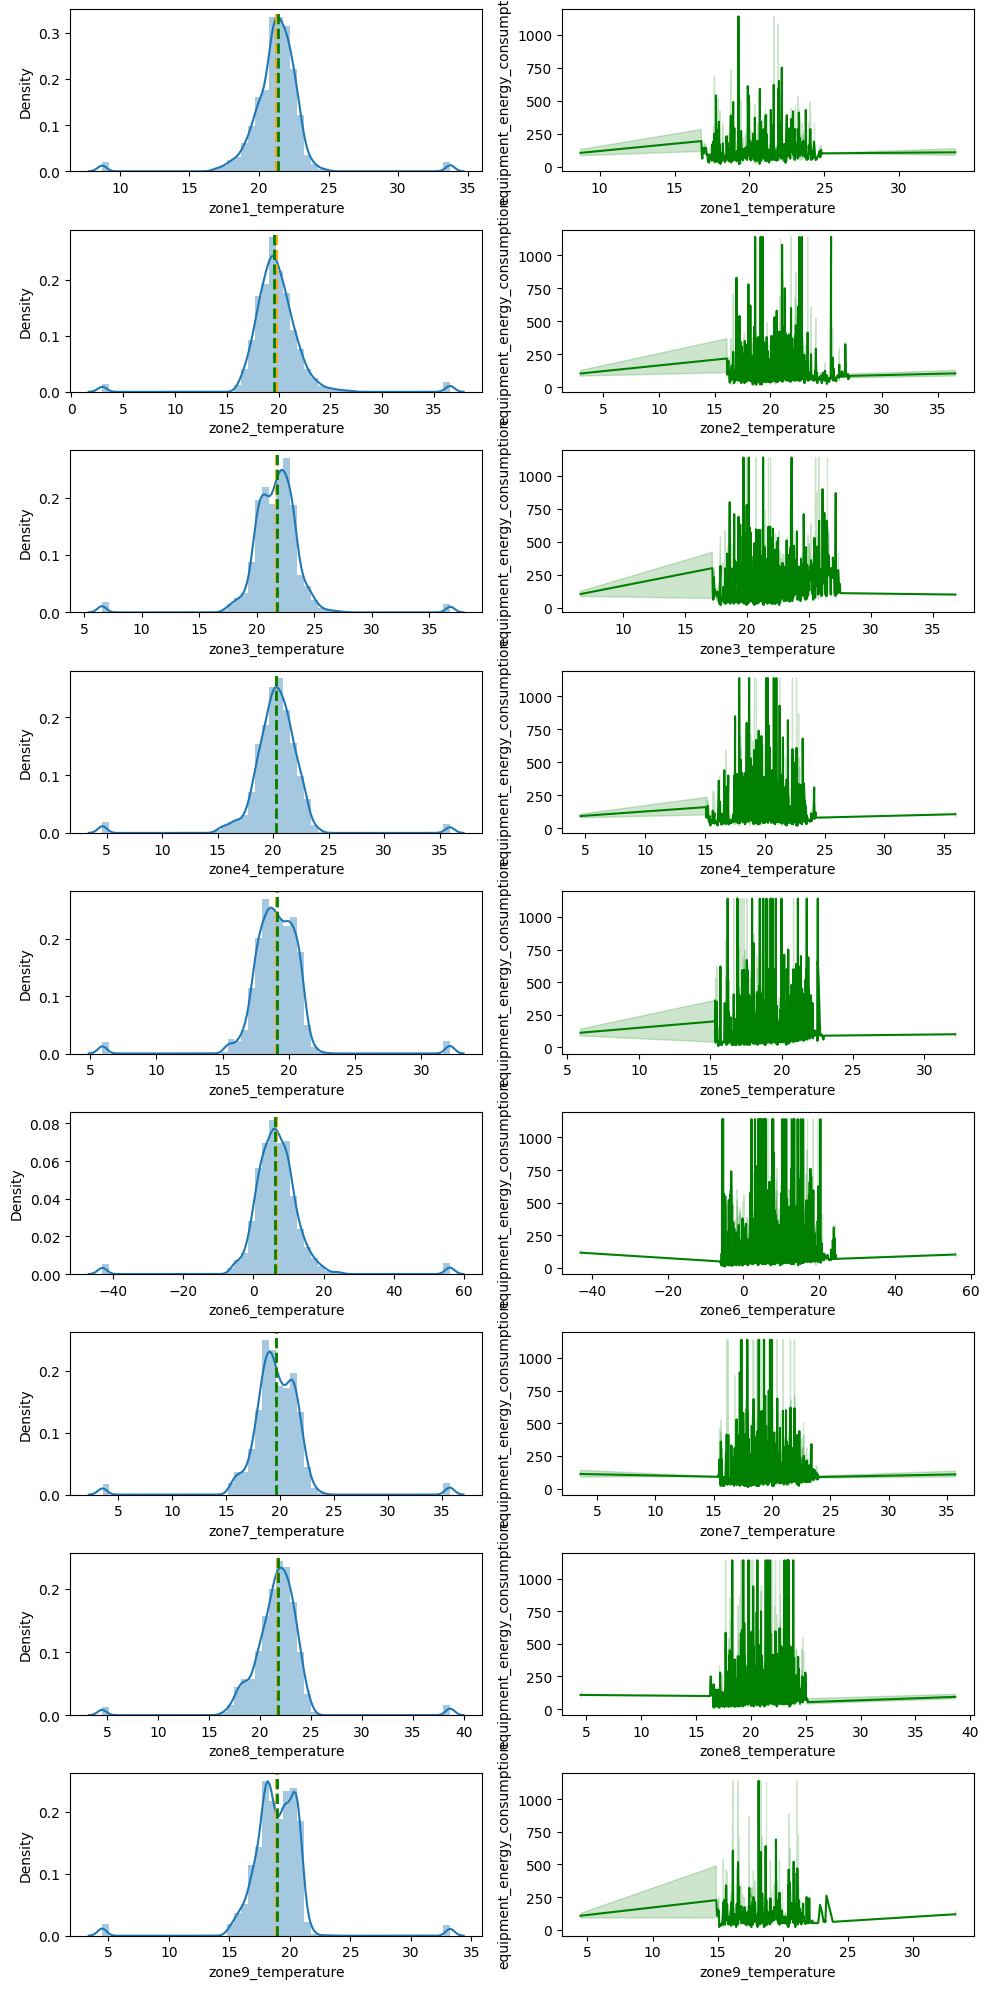

In [17]:
temp_cols = [col for col in data.columns if 'temperature' in col]
temp_cols.remove('outdoor_temperature')
n=len(temp_cols)
fig,ax=plt.subplots(len(temp_cols),2,figsize=(10,20))
for i,col in enumerate(temp_cols):
  #univariate of the columns
  dist=sns.distplot(data[col],ax=ax[i,0])
  ax[i,0].axvline(data[col].mean(), color='orange', linestyle='dashed', linewidth=2)
  ax[i,0].axvline(data[col].median(), color='green', linestyle='dashed', linewidth=2)
  #Bivariate Analysis the Equipment Energy
  #lineplot
  scatter=sns.lineplot(data=data,x=col,y='equipment_energy_consumption',color='green',ax=ax[i,1])
plt.tight_layout()
plt.show()


### 1. Why did you pick the specific chart?

* Again, the reason for using distplot is that it provides a quick overview of the skewness, allowing us to decide whether or not to perform the transformation.

* A scatterplot is used to plot how much a numerical feature is affected by another numerical value.

* A line plot is also used to observe how numerical values change over time.

### 2. What is/are the insight(s) found from the chart?

* All Temperature columns are followed normally distribution.
  
* Except Zone 6, remaining Zone temperatures mean and median value lie between 19 to 22 degree celcius.
  
* Zone 6 temperature mean and median value lies between 7 to 10 degree celcius.
  
* The lines in nearly all of the columns follow the same pattern.
  
*  It could be due to the same type of relationship between temperature variables and the Equipment Energy Consumption.

*  Zone 6 temperature has high negative values which should be handled properly

### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* When inside building temperatures are below 15 degree celcius energy consumption is minmium means maximum energy can saved.

* All temperatures have similar relationship with appliance energy consumption. It leads to multicolinarity. These columns will be dropped in upcoming appropriate section by taking average.

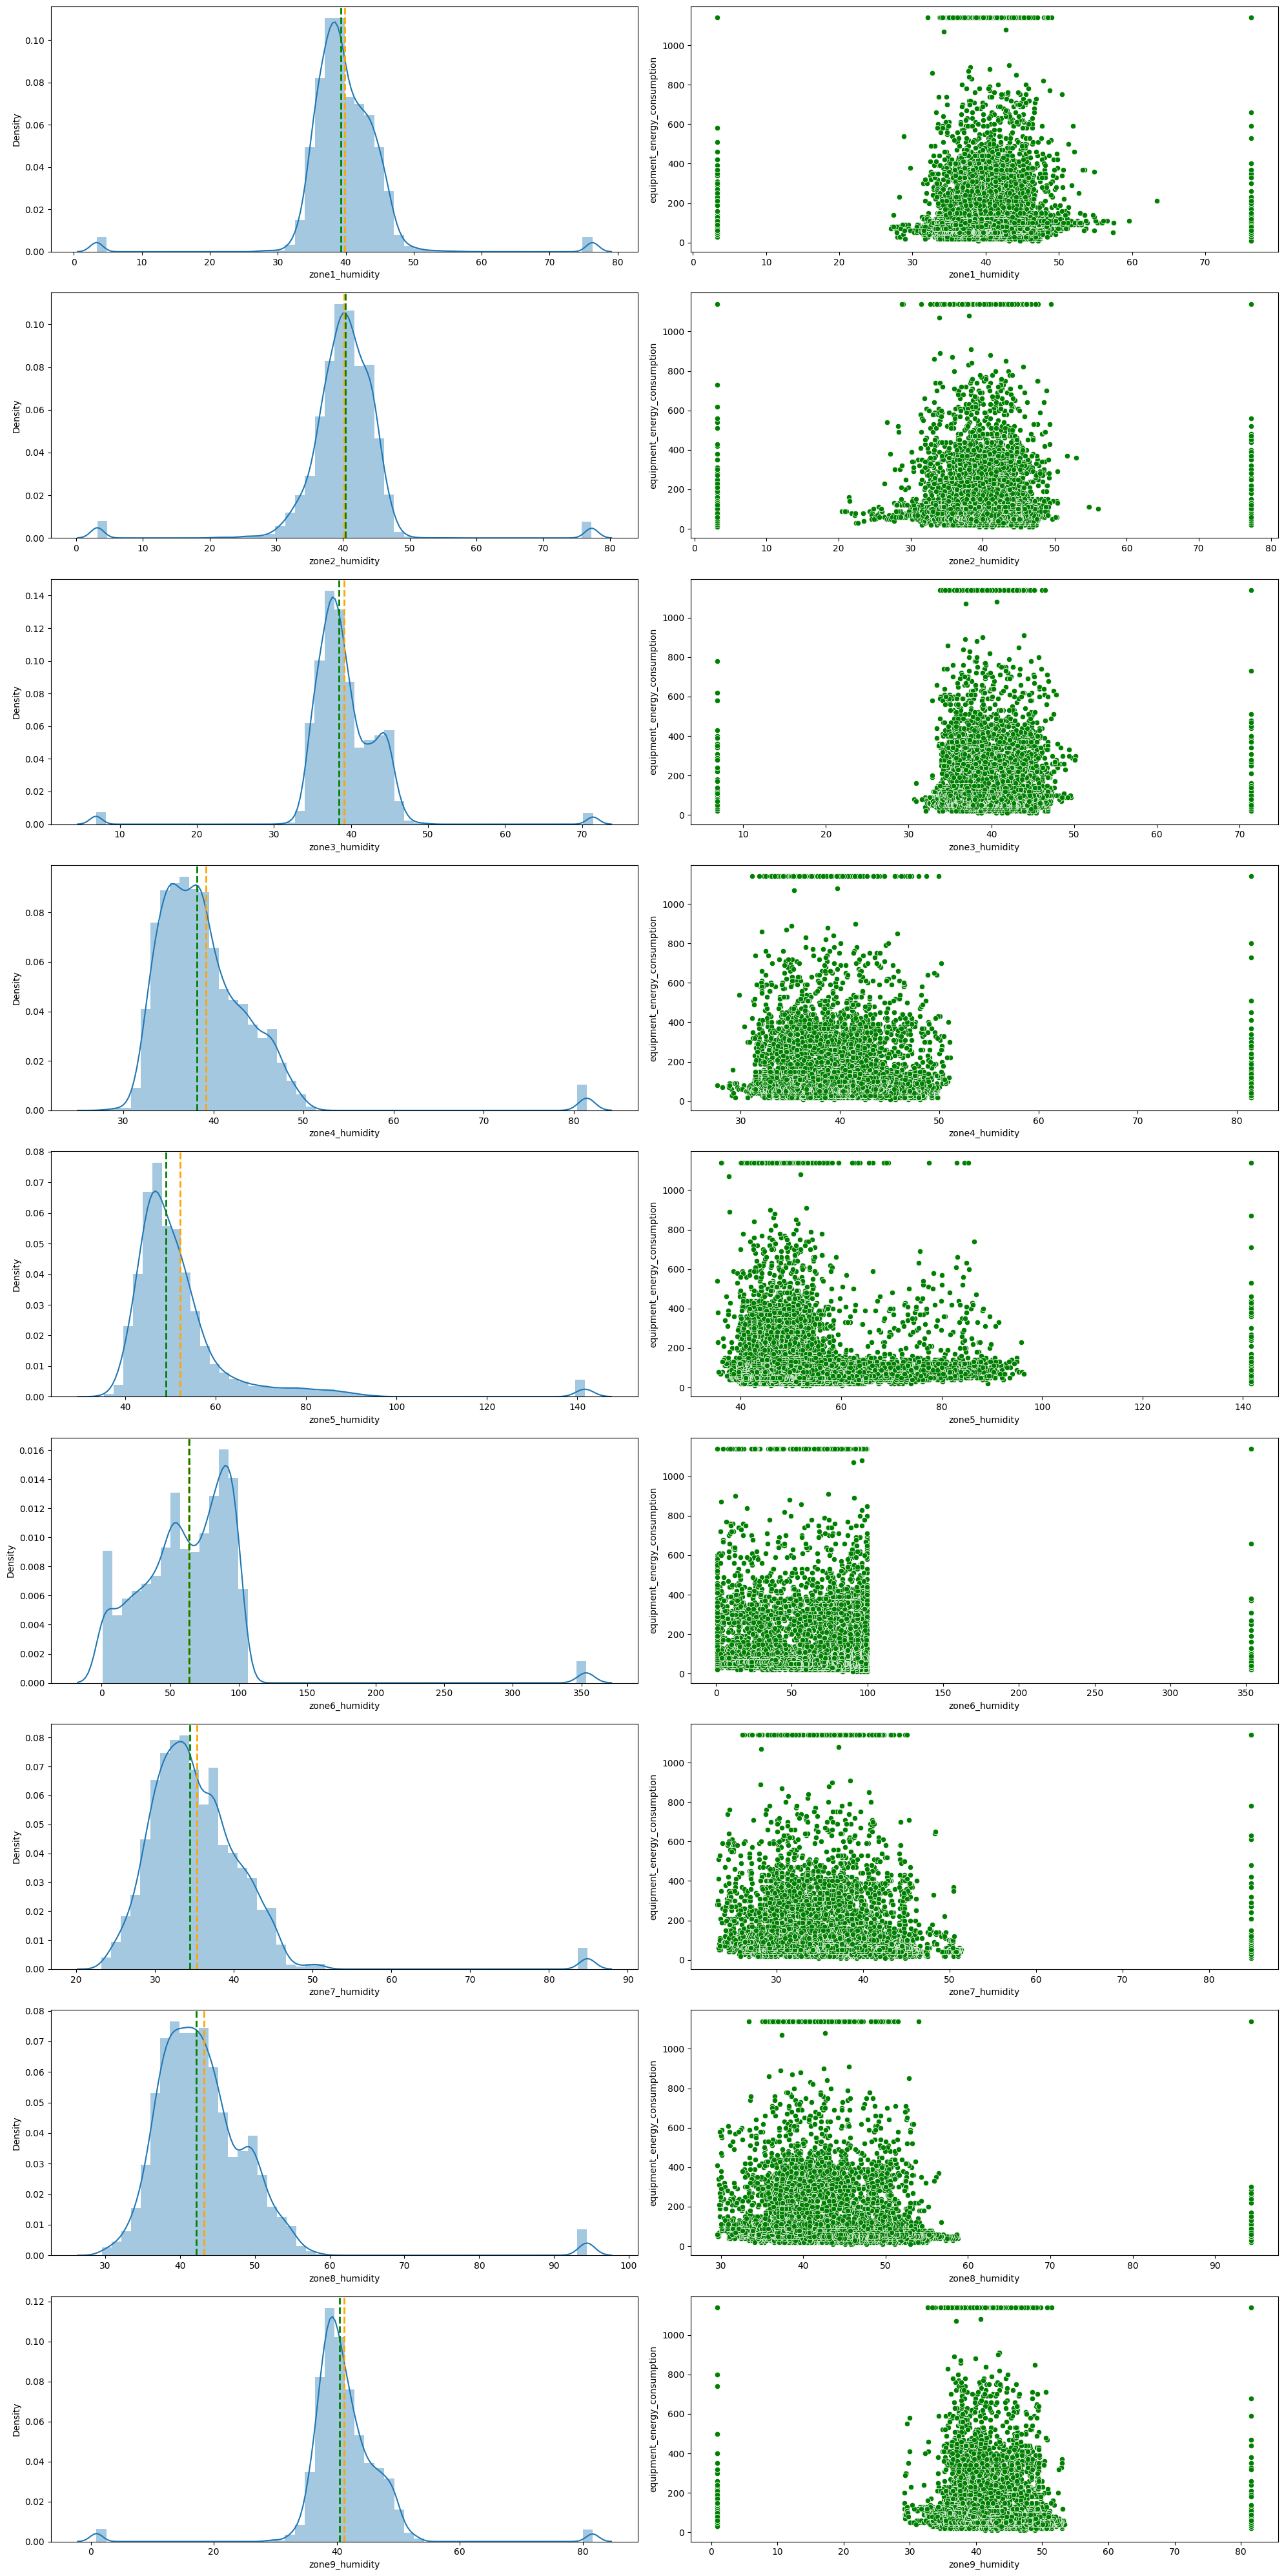

In [18]:
hu_cols = [col for col in data.columns if 'humidity' in col]
hu_cols.remove('outdoor_humidity')
fig,ax=plt.subplots(len(hu_cols),2,figsize=(20,40))
for i,col in enumerate(hu_cols):
  #univariate of the columns
  dist=sns.distplot(data[col],ax=ax[i,0])
  ax[i,0].axvline(data[col].mean(), color='orange', linestyle='dashed', linewidth=2)
  ax[i,0].axvline(data[col].median(), color='green', linestyle='dashed', linewidth=2)
  #Bivariate Analysis the Equipment Energy
  #lineplot
  scatter=sns.scatterplot(data=data,x=col,y='equipment_energy_consumption',color='green',ax=ax[i,1])
plt.tight_layout()
plt.show()

### 1. Why did you pick the specific chart?

* Again, the reason for using distplot is that it provides a quick overview of the skewness, allowing us to decide whether or not to perform the transformation.

* A scatterplot is used to plot how much a numerical feature is affected by another numerical value.

### 2. What is/are the insight(s) found from the chart?

* All humidity distribution follows normal distribution except Zone 6.
  
* In different zones, the mean and median value of humidity distribution lies between 35 to 45 percent, except zone 6 where it is near about 55 percent.
  
* For Different zones except zone 6, low and high humidity cause low consumption of energy. otherwise it causes high spreading of energy consumption.
  
* For Zone 6, humidity energy consumption data is widely spread irrespective of humidity.


### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* low humidity and high humidity can saves maximum energy.
*All humidities have similar relationship with appliance energy consumption.It leads to multicolinarity.These columns will be dropped in upcoming appropriate section by taking average.

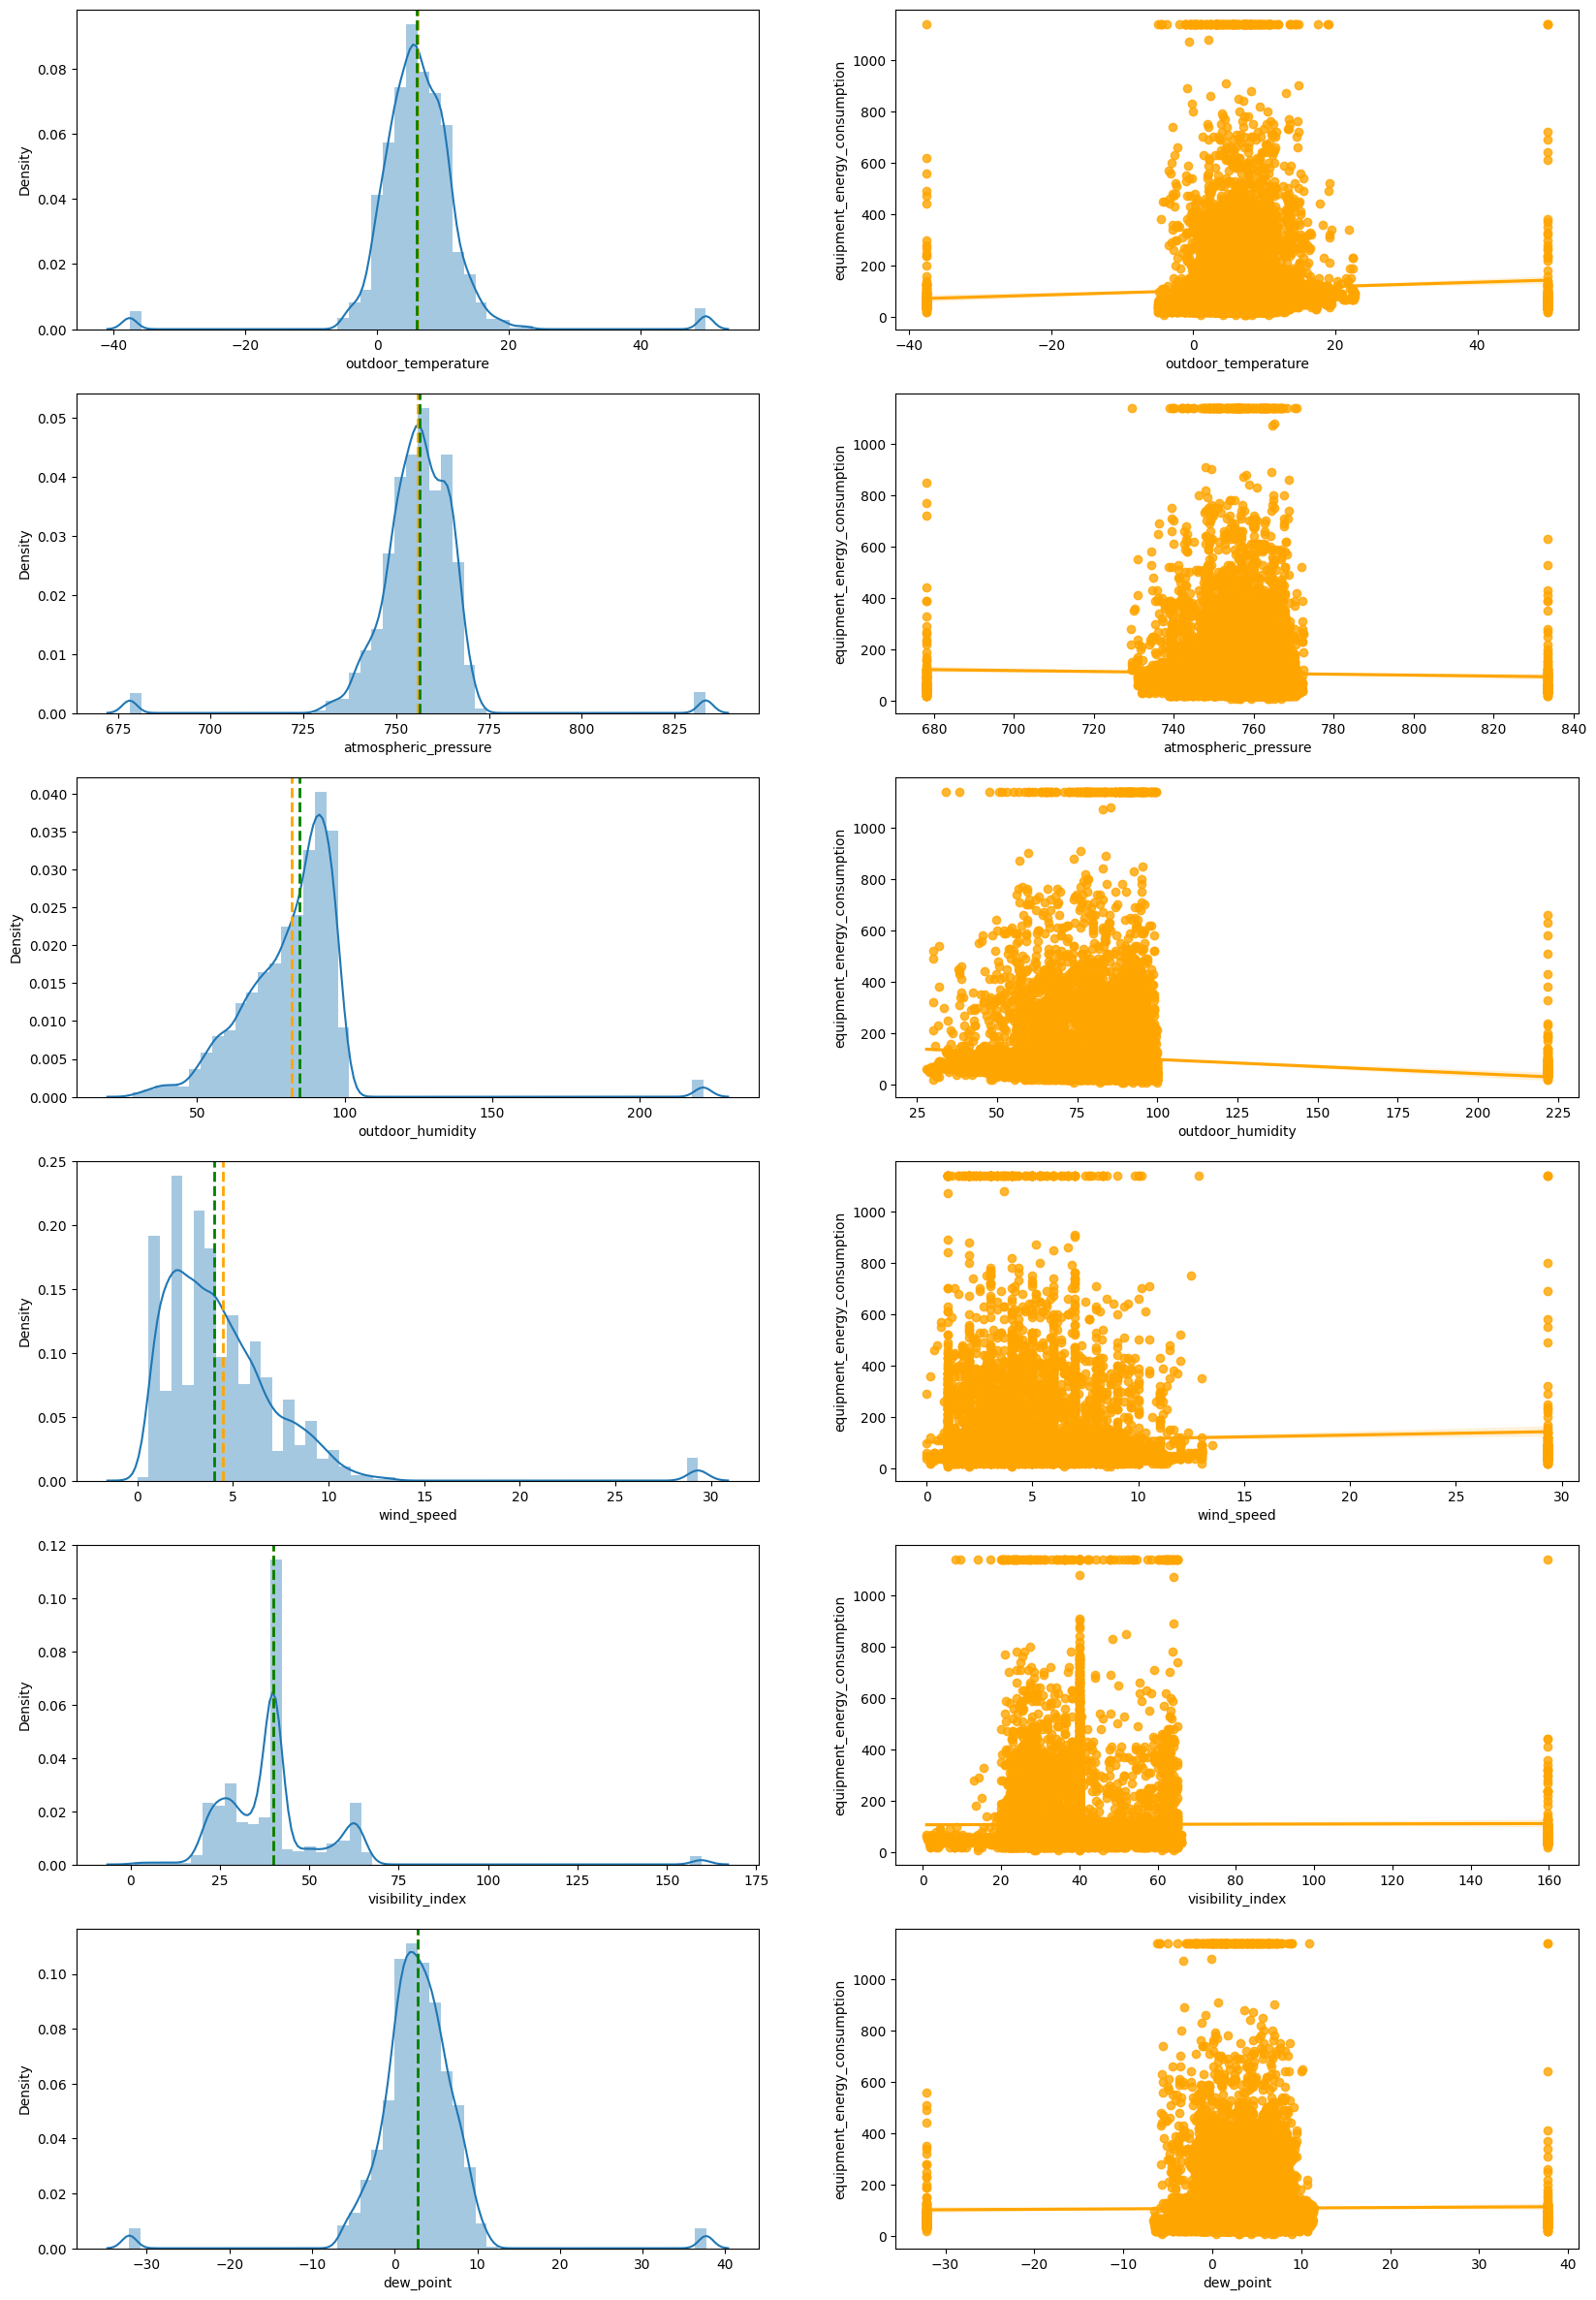

In [19]:
weather_cols = ['outdoor_temperature', 'atmospheric_pressure', 'outdoor_humidity', 'wind_speed', 'visibility_index', 'dew_point']
fig,ax=plt.subplots(len(weather_cols),2,figsize=(20,30))
for i,col in enumerate(weather_cols):
  #univariate of the columns
  dist=sns.distplot(data[col],ax=ax[i,0])
  ax[i,0].axvline(data[col].mean(), color='orange', linestyle='dashed', linewidth=2)
  ax[i,0].axvline(data[col].median(), color='green', linestyle='dashed', linewidth=2)
  #Bivariate Analysis of the Equipment Energy
  #lineplot
  scatter=sns.regplot(data=data,x=col,y='equipment_energy_consumption',color='orange',ax=ax[i,1]);

### 1. Why did you pick the specific chart?

* Again, the reason for using distplot is that it provides a quick overview of the skewness, allowing us to decide whether or not to perform the transformation.

* Regplot method is used to plot data and a linear regression model fit. we can observe if the feature  can fit with regression problem.

### 2. What is/are the insight(s) found from the chart?

* Temperature outside, Visibility, Pressure, and dew point have followed normal distribution.
  
* Windspeed is positively skewed
  
* Outside humidity is negatively skewed.
  
* When the outside temperature is below 0 degrees, the spread of the energy used data is low. The mean value of energy used is exceptionally high near 5 and 10 degrees Celsius
  
* When outside humidity is below 50 percent, the spread of the energy used data is low. The mean value of energy used is exceptionally high, near about 70 and 90 percent of humidity.
  
* When pressure is below 735, the distribution of energy consumption is low, other than it is highly spread.
  
* When the wind speed is above 10, the distribution of energy consumption is low. When the wind speed is 1 and 5, the mean energy consumption is exceptionally high.

### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* When the outside temperature is below 0 degrees Celsius, outside humidity is below 50 percent, visibility is below 10 and dewpoint is less than -5 or greater 5 the possibility of energy saving is high.
  
* Temperature, Humidity, and dewpoint have a high probability of colinearity. It will be inspected further in the upcoming section.

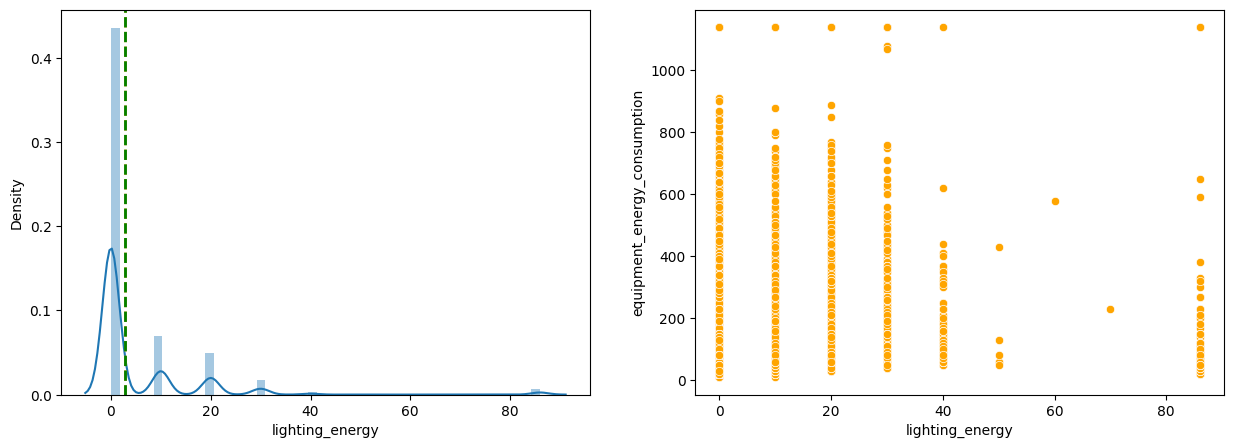

In [20]:
fig,ax=plt.subplots(1,2,figsize=(15,5))

  #univariate of the columns
dist = sns.distplot(data['lighting_energy'],ax=ax[0])
ax[0].axvline(data[col].mean(), color='orange', linestyle='dashed', linewidth=2)
ax[0].axvline(data[col].median(), color='green', linestyle='dashed', linewidth=2)
  #Bivariate Analysis of the Equipment Energy
  #lineplot
scatter=sns.scatterplot(data=data,x='lighting_energy',y='equipment_energy_consumption',color='orange',ax=ax[1]);

### 1. Why did you pick the specific chart?

* Again, the reason for using distplot is that it provides a quick overview of the skewness, allowing us to decide whether or not to perform the transformation.

* A scatterplot is used to plot how much a numerical feature is affected by another numerical value.

### 2. What is/are the insight(s) found from the chart?

This column neither follows the normal distribution nor the relevant skewness.Also, because this column isn't adding many values to the dataset, we'll remove it in the upcoming step.

### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It has no impact on the buisness.

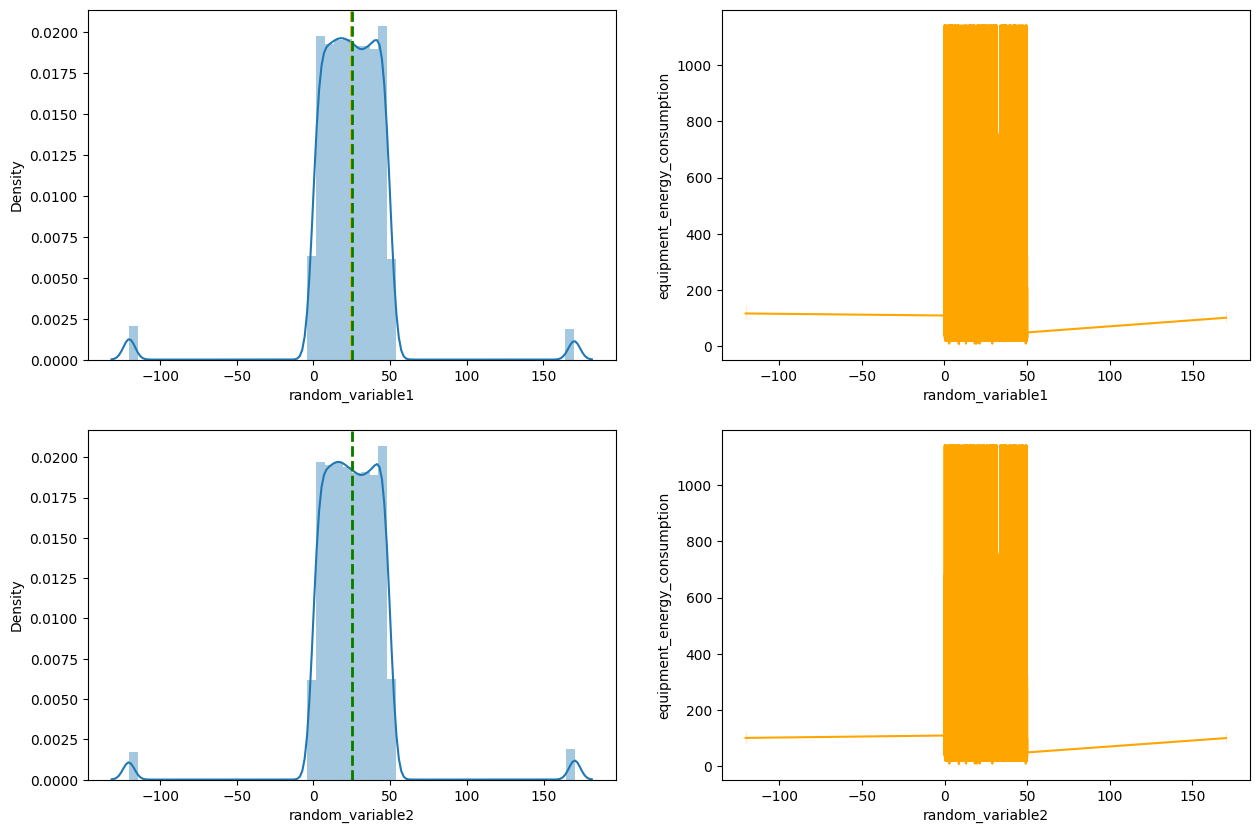

In [21]:
random_col = ['random_variable1', 'random_variable2']
fig,ax=plt.subplots(len(random_col),2,figsize=(15,10))
for i, col in enumerate(random_col):
  #univariate of the columns
  dist=sns.distplot(data[col],ax=ax[i,0])
  ax[i,0].axvline(data[col].mean(), color='orange', linestyle='dashed', linewidth=2)
  ax[i,0].axvline(data[col].median(), color='green', linestyle='dashed', linewidth=2)
  #Bivariate Analysis of the Equipment Energy
  #lineplot
  scatter=sns.lineplot(data=data,x=col,y='equipment_energy_consumption',color='orange',ax=ax[i,1]);

### 1. Why did you pick the specific chart?

* Again, the reason for using distplot is that it provides a quick overview of the skewness, allowing us to decide whether or not to perform the transformation.

* A scatterplot is used to plot how much a numerical feature is affected by another numerical value.

### 2. What is/are the insight(s) found from the chart?

* The distribution of random variables is symmetric
  
* Two random variables have the same distribution and a similar relationship with Equipment energy. It leads to multicollinearity, and one must be dropped in the upcoming steps.

### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It has no impact on the buisness.

## Data Preprocessing

In [22]:
#Filling nans of data with mean
for column in data.columns:
    if column != 'equipment_energy_consumption':
        mean_value = data[column].median()
        data[column].fillna(mean_value, inplace=True)

In [23]:
# Dataset Duplicate Value Count
data.duplicated().sum()

64

In [24]:
#Dropping duplicates
data = data.drop_duplicates()
data.duplicated().sum()

0

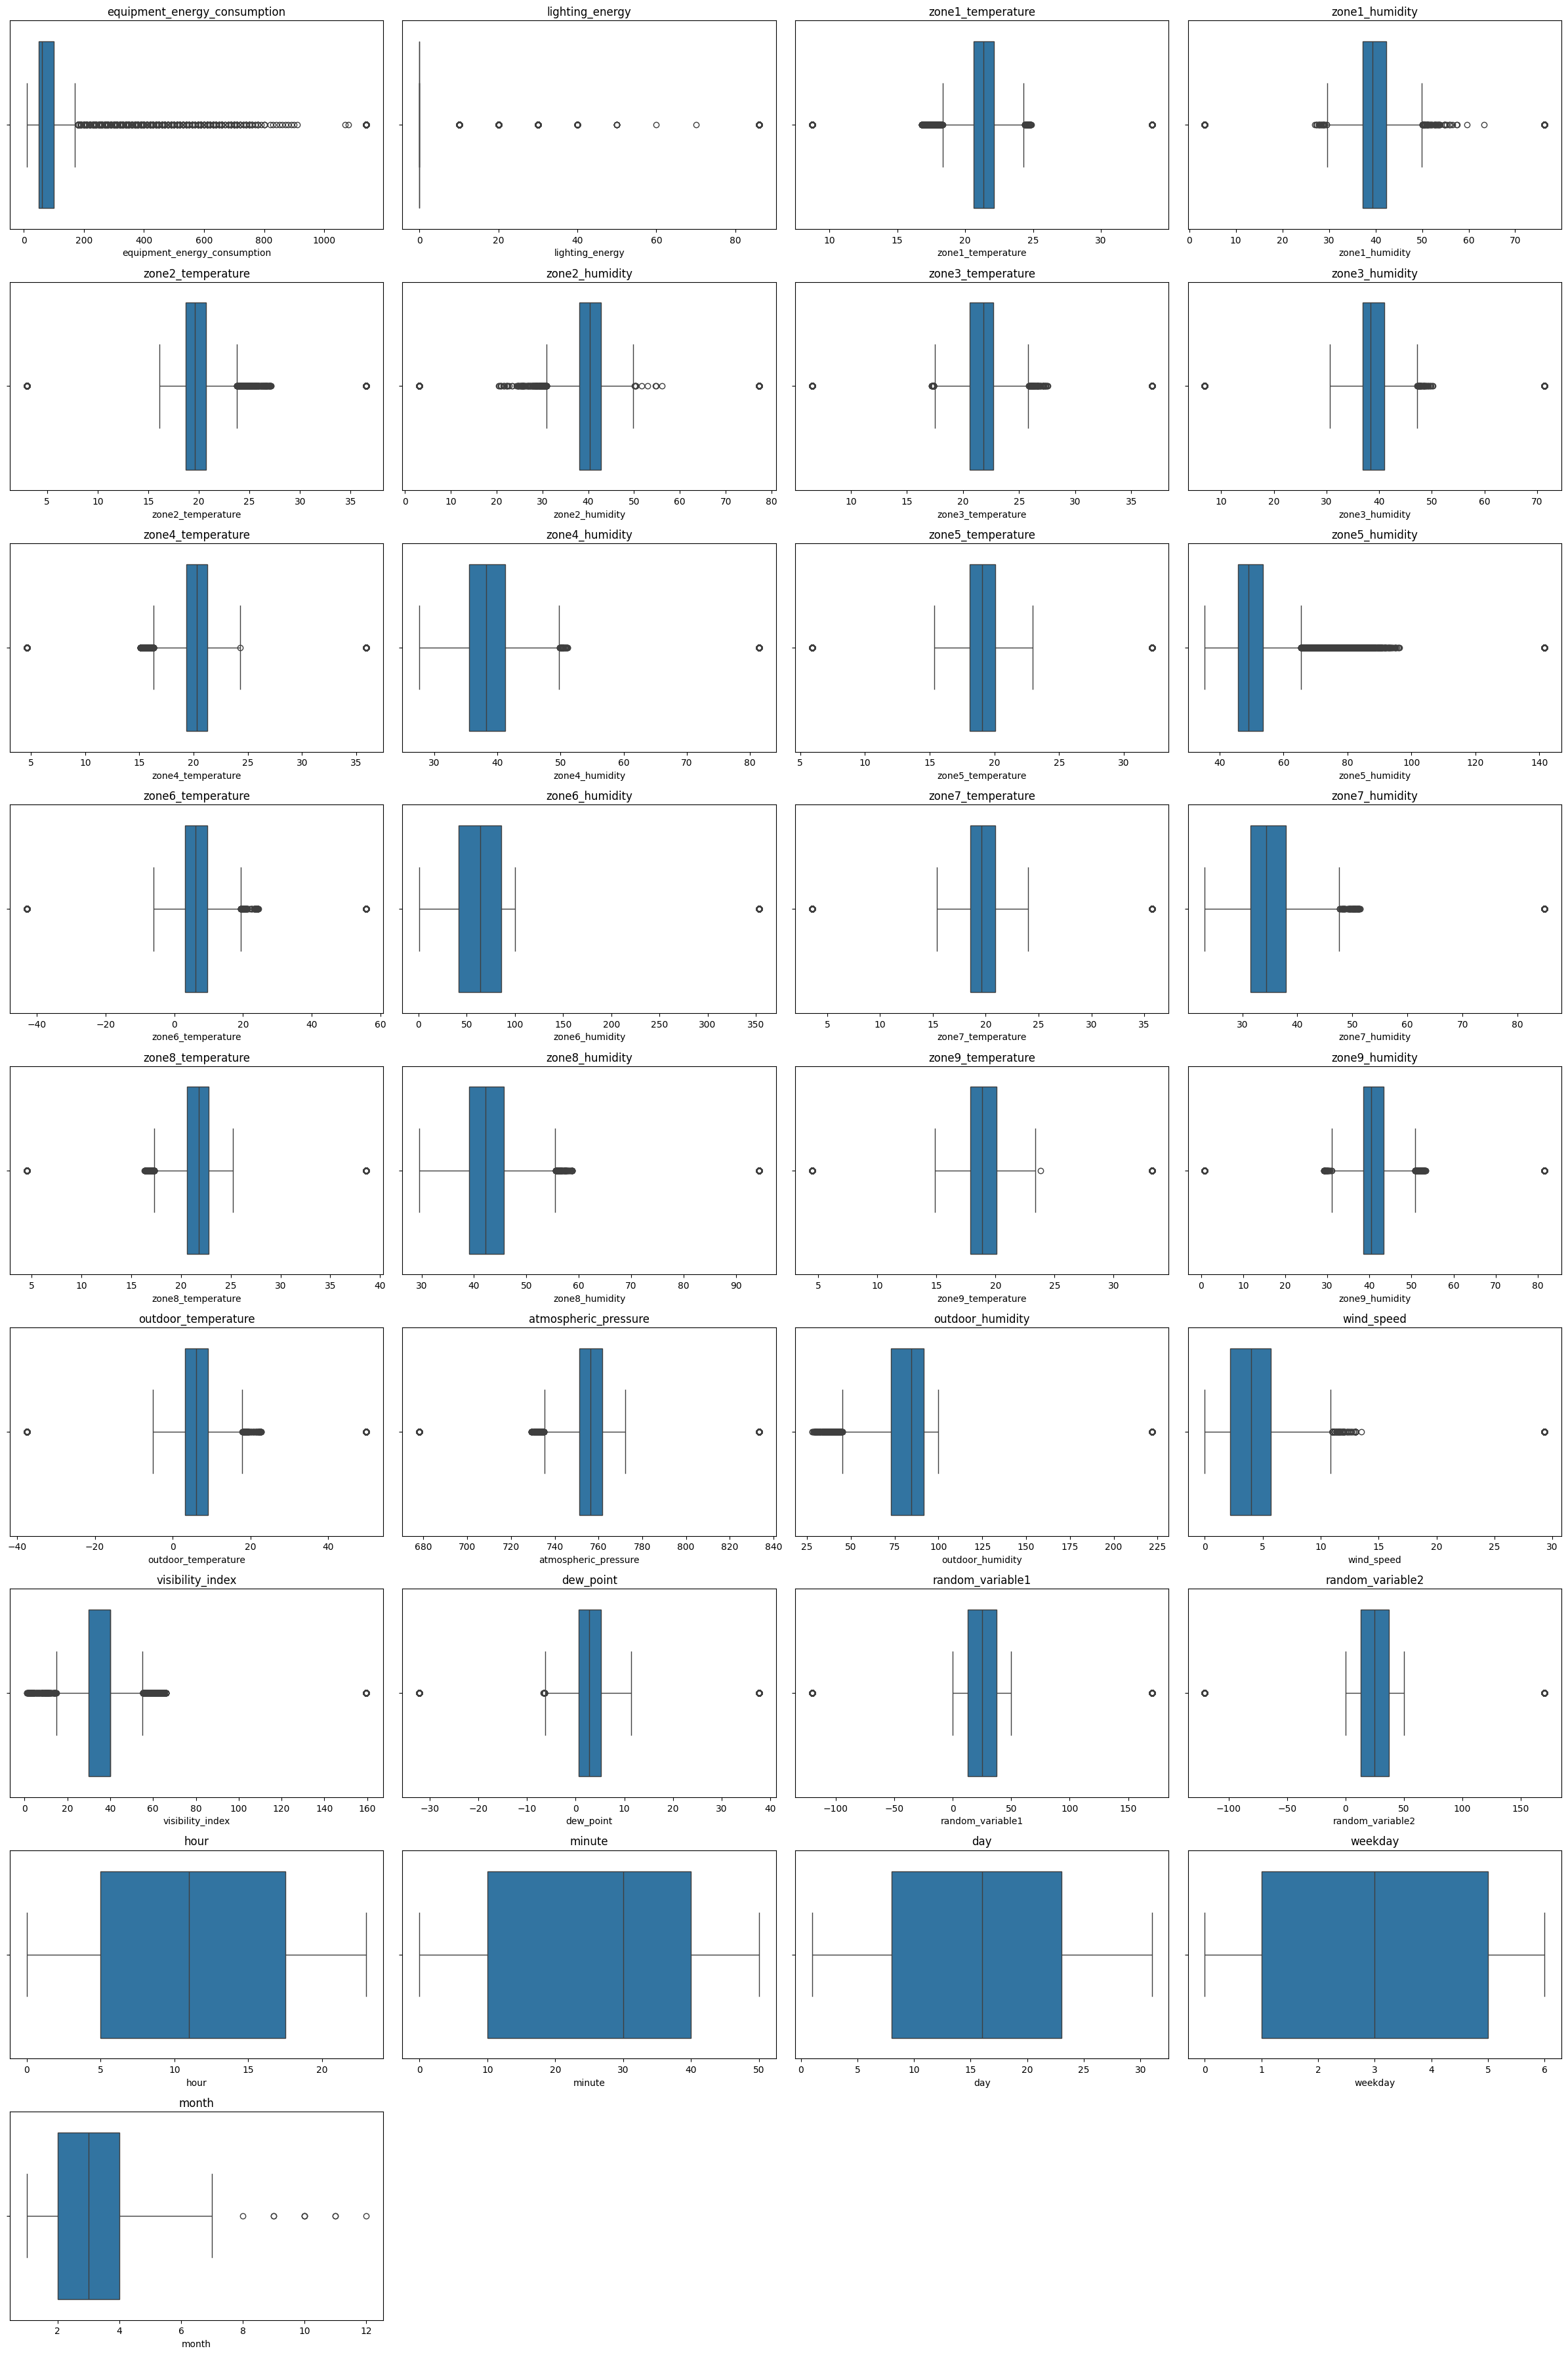

In [25]:
#Box plot for all features to find outliers
cols_batch = data.columns  
num_features = len(cols_batch)
cols = 4 # number of columns in the subplot grid
rows = math.ceil(num_features / cols)

plt.figure(figsize=(cols * 6, rows * 4))

for i, col in enumerate(cols_batch, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x=data[col])
    plt.title(col)
    plt.tight_layout()

plt.show()


In [26]:
# Handling Outliers & Outlier treatments
for ftr in data.columns:
  print(ftr,'\n')
  q_25= np.percentile(data[ftr], 25)
  q_75 = np.percentile(data[ftr], 75)
  iqr = q_75 - q_25
  print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q_25, q_75, iqr))
  # calculate the outlier cutoff
  cut_off = iqr * 1.5
  lower = q_25 - cut_off
  upper = q_75 + cut_off
  print(f"\nlower = {lower} and upper = {upper} \n ")
  # identify outliers
  outliers = [x for x in data[ftr] if x < lower or x > upper]
  print('Identified outliers: %d' % len(outliers))
  #removing outliers
  if len(outliers)!=0:

    def bin(row):
      if row[ftr]> upper:
        return upper
      if row[ftr] < lower:
        return lower
      else:
        return row[ftr]



    data[ftr] =  data.apply (lambda row: bin(row), axis=1)
    print(f"{ftr} Outliers Removed")
  print("\n-------\n")

equipment_energy_consumption 

Percentiles: 25th=50.000, 75th=100.000, IQR=50.000

lower = -25.0 and upper = 175.0 
 
Identified outliers: 1867
equipment_energy_consumption Outliers Removed

-------

lighting_energy 

Percentiles: 25th=0.000, 75th=0.000, IQR=0.000

lower = 0.0 and upper = 0.0 
 
Identified outliers: 3645
lighting_energy Outliers Removed

-------

zone1_temperature 

Percentiles: 25th=20.600, 75th=22.100, IQR=1.500

lower = 18.35 and upper = 24.35 
 
Identified outliers: 702
zone1_temperature Outliers Removed

-------

zone1_humidity 

Percentiles: 25th=37.200, 75th=42.312, IQR=5.112

lower = 29.532500000000038 and upper = 49.979166666666615 
 
Identified outliers: 385
zone1_humidity Outliers Removed

-------

zone2_temperature 

Percentiles: 25th=18.667, 75th=20.700, IQR=2.033

lower = 15.61666666666675 and upper = 23.74999999999995 
 
Identified outliers: 604
zone2_temperature Outliers Removed

-------

zone2_humidity 

Percentiles: 25th=38.060, 75th=42.790, IQR=4.730

### What all manipulations have you done and insights you found?

* Eliminating duplicate data from the dataset saves time and money by avoiding the repetition of the same data sent to the machine learning model.

* If you try with dropna 80% of data will be removed. So filling these mising values with their respective column mean is effective
  
* Removed Outliers from data using 3 standard deviations

## Feature engineering and selection

In [27]:
data.head()

equipment_energy_consumption  lighting_energy  zone1_temperature  \
0                          60.0              0.0              24.35   
1                          60.0              0.0              19.89   
2                          50.0              0.0              19.89   
3                          50.0              0.0              24.35   
4                          60.0              0.0              19.89   

   zone1_humidity  zone2_temperature  zone2_humidity  zone3_temperature  \
0       47.596667               19.2       44.790000              19.79   
1       46.693333               19.2       44.722500              19.79   
2       46.300000               19.2       44.626667              19.79   
3       46.066667               19.2       44.590000              19.79   
4       46.333333               19.2       44.530000              19.79   

   zone3_humidity  zone4_temperature  zone4_humidity  ...  wind_speed  \
0       38.400000             19.000       45.566667  ...    7.000000   
1       44.790000             19.000       45.992500  ...    6.666667   
2       44.933333             24.275       45.890000  ...    6.333333   
3       45.000000             20.290       45.723333  ...    6.000000   
4       45.000000             18.890       45.530000  ...    5.666667   

   visibility_index  dew_point  random_variable1  random_variable2  hour  \
0         55.000000      5.300         13.275433         13.275433    17   
1         55.000000      5.200         18.606195         18.606195    17   
2         55.000000      5.100         28.642668         28.642668    17   
3         51.500000     12.025         45.410389         45.410389    17   
4         47.666667      4.900         10.084097         10.084097    17   

   minute  day  weekday  month  
0       0   11        0    1.0  
1      10   11        0    1.0  
2      20   11        0    1.0  
3      30   11        0    1.0  
4      40   11        0    1.0  

[5 rows x 33 columns]

<Axes: >

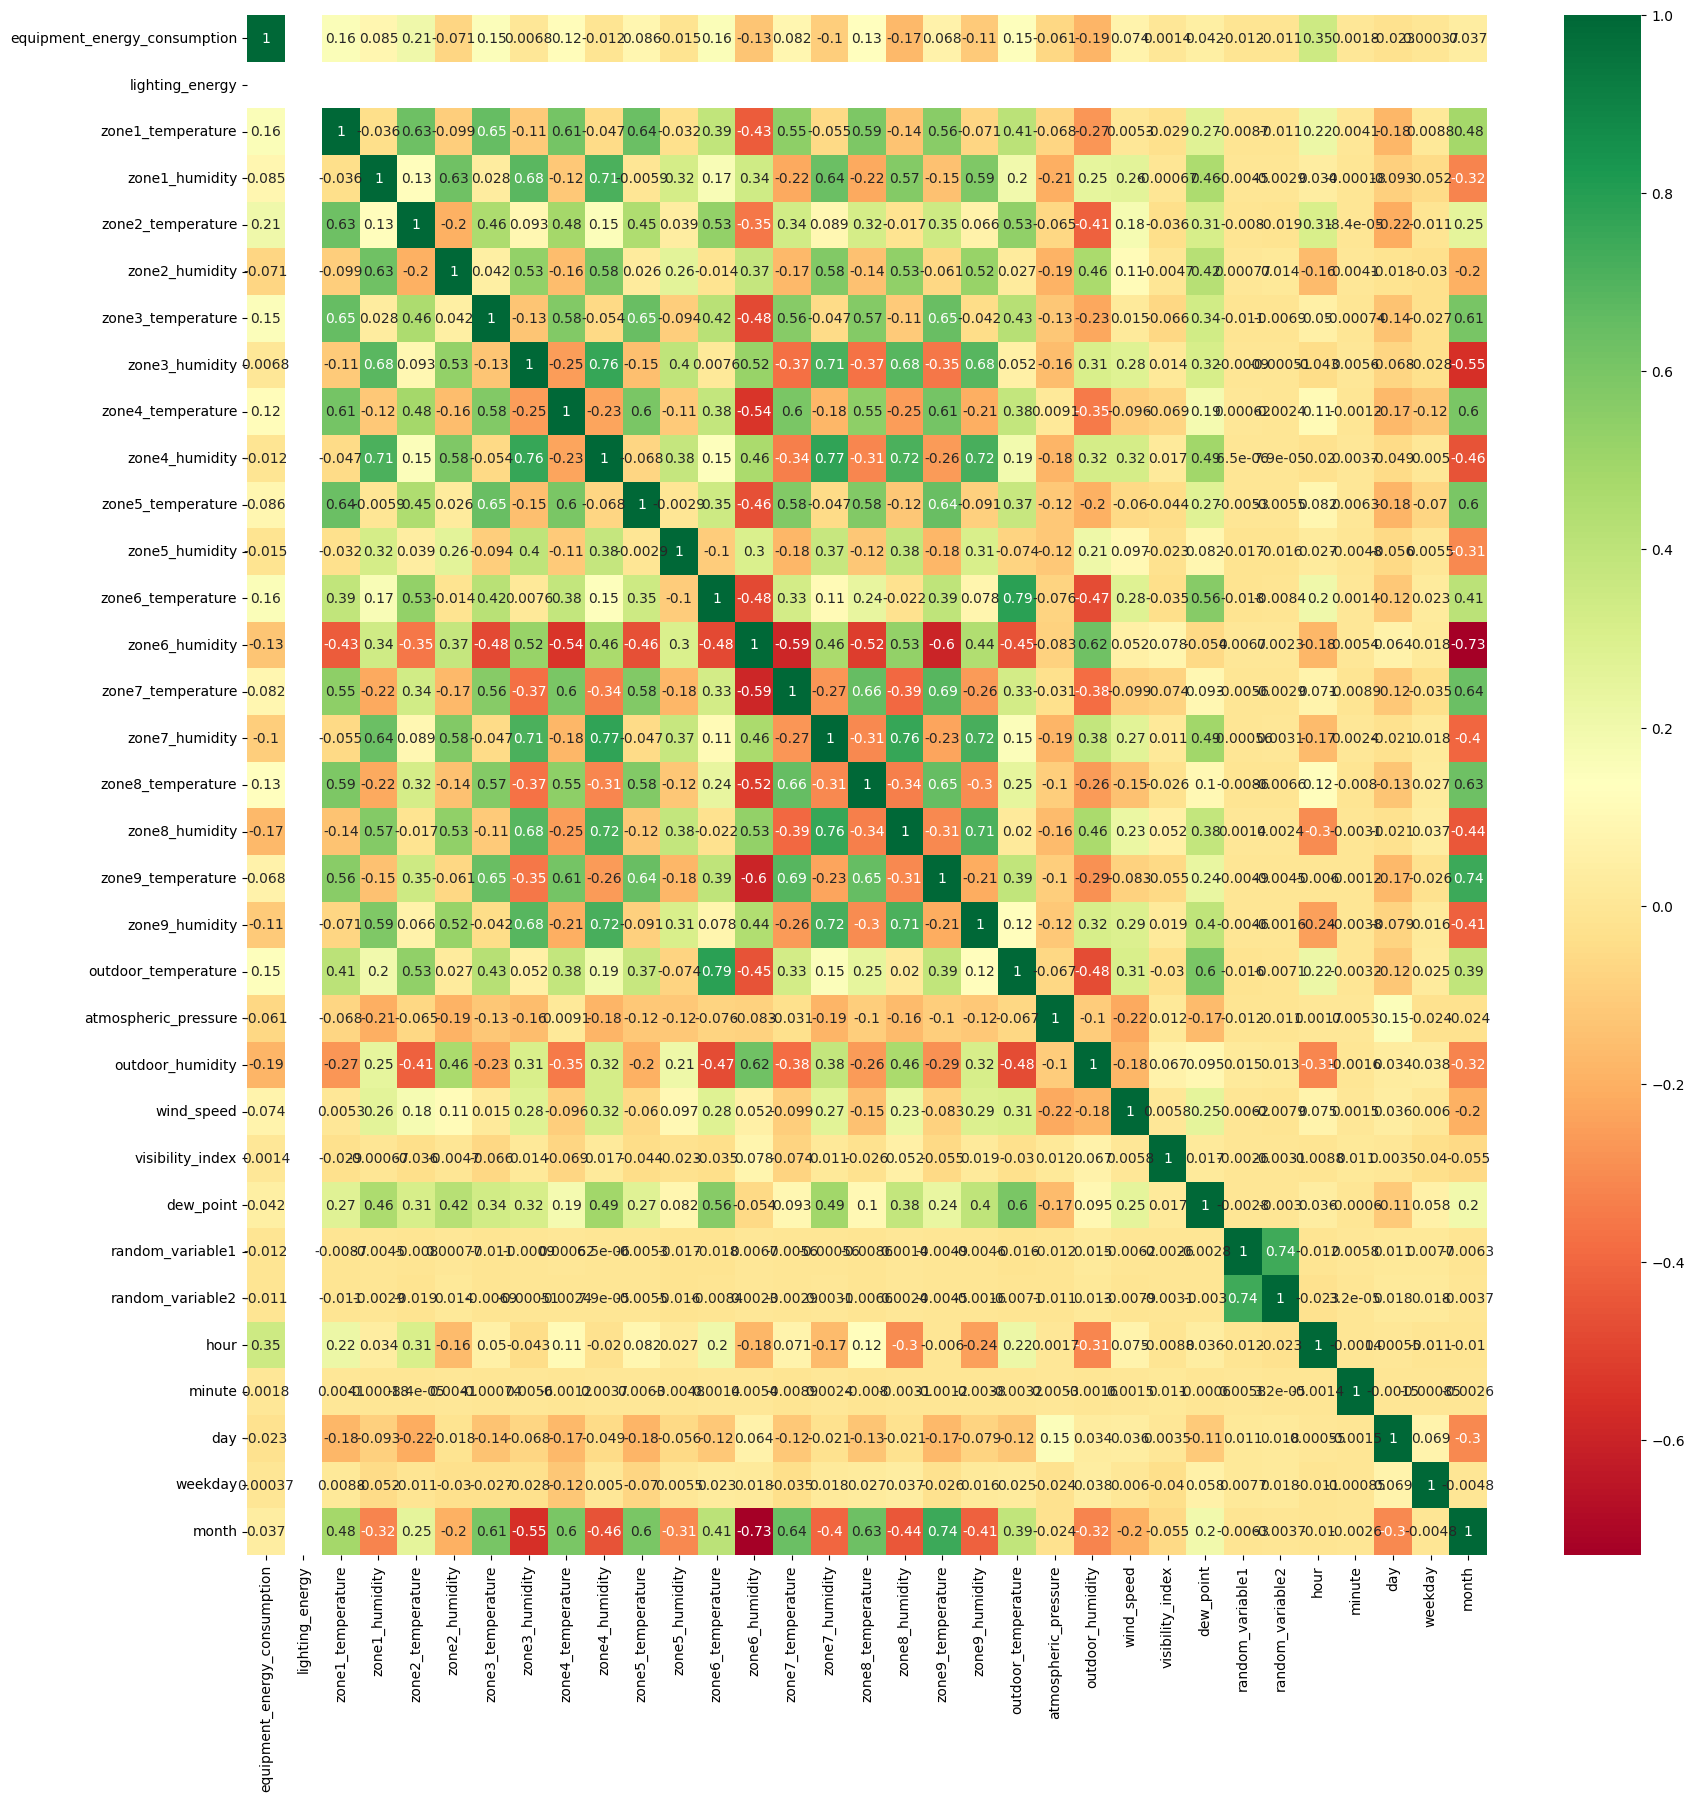

In [28]:
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [29]:
#correlation of features with target variable
corrmat['equipment_energy_consumption'].sort_values(ascending=False).index

Index(['equipment_energy_consumption', 'hour', 'zone2_temperature',
       'zone6_temperature', 'zone1_temperature', 'zone3_temperature',
       'outdoor_temperature', 'zone8_temperature', 'zone4_temperature',
       'zone5_temperature', 'zone1_humidity', 'zone7_temperature',
       'wind_speed', 'zone9_temperature', 'dew_point', 'month',
       'zone3_humidity', 'minute', 'visibility_index', 'weekday',
       'random_variable2', 'random_variable1', 'zone4_humidity',
       'zone5_humidity', 'day', 'atmospheric_pressure', 'zone2_humidity',
       'zone7_humidity', 'zone9_humidity', 'zone6_humidity', 'zone8_humidity',
       'outdoor_humidity', 'lighting_energy'],
      dtype='object')

### 1. Why did you pick the specific chart?

The main reasons for using the heat map are:

* Heatmaps provide a quick overview of critical web performance factors.

* Heatmaps are a visual way to understand numerical features.

* Heatmaps assist businesses in making informed decisions that benefit the bottom line.

* It also aids in comprehending multicollinearity, which allows us to determine which features to keep and which to eliminate or combine.


### 2. What is/are the insight(s) found from the chart?

* Temperature columns: It is clear from the heatmap that four columns have a high degree of correlation with zones 1,2,3,6 comparatively.
  
* Humidity columns: For every humidity column, we see a moderate correlation, which is workable.
  
* Weather columns: Visibility, dewpoint, Pressure have low correlation values
  
* Random variables column: Similar to the trend that we have seen in the weather columns, we have low correlations
  

In [30]:
#Manipulate Features to minimize feature correlation
# create new features
# create a column average zone temperature based on all temperature
data['avg_zone_temperature'] = data[[f'zone{i}_temperature' for i in range(1, 10)]].mean(axis=1)

#create a column of the difference between outside and zone temperature
data['Temperature_difference']=abs(data['avg_zone_temperature']-data['outdoor_temperature'])

#create a column average zone humidity
data['avg_zone_humidity'] = data[[f'zone{i}_humidity' for i in range(1, 10)]].mean(axis=1)

#create a column of the difference between zone and outside building humidity
data['Humidity_difference']=abs(data['avg_zone_humidity']-data['outdoor_humidity'])
 

**Checking Multicollinearity**

In [31]:

#create a function to check multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [round(variance_inflation_factor(X.values, i),2) for i in range(X.shape[1])]

    return(vif)

In [32]:
#check multicolinearuty
calc_vif(data[[i for i in data.describe().columns if i not in ['equipment_energy_consumption']]]).sort_values(by='VIF',ascending=False)

variables        VIF
1        zone1_temperature        inf
12          zone6_humidity        inf
34       avg_zone_humidity        inf
32    avg_zone_temperature        inf
2           zone1_humidity        inf
17       zone9_temperature        inf
16          zone8_humidity        inf
15       zone8_temperature        inf
14          zone7_humidity        inf
13       zone7_temperature        inf
18          zone9_humidity        inf
11       zone6_temperature        inf
10          zone5_humidity        inf
9        zone5_temperature        inf
8           zone4_humidity        inf
7        zone4_temperature        inf
6           zone3_humidity        inf
5        zone3_temperature        inf
3        zone2_temperature        inf
4           zone2_humidity        inf
21        outdoor_humidity  974543.38
35     Humidity_difference  227327.43
33  Temperature_difference   13627.79
19     outdoor_temperature    4492.01
20    atmospheric_pressure     950.41
31                   month      46.78
23        visibility_index      15.73
26        random_variable2       7.80
25        random_variable1       7.70
29                     day       6.31
27                    hour       6.19
22              wind_speed       5.35
24               dew_point       5.00
30                 weekday       3.50
28                  minute       3.14
0          lighting_energy        NaN

It's look like lots of column is replica of one another.so we are going to remove them

In [33]:
#check multicolinearuty
calc_vif(data[[i for i in data.describe().columns if i not in ['equipment_energy_consumption', 'lighting_energy', 'zone9_temperature', 'zone6_temperature', 'avg_zone_humidity',
        'outdoor_temperature', 'zone9_humidity', 'Temperature_difference', 'zone8_humidity', 'zone8_temperature', 'zone7_humidity',
        'zone7_temperature', 'zone6_humidity', 'zone5_humidity', 'avg_zone_temperature', 'outdoor_humidity', 'zone1_temperature',
        'atmospheric_pressure', 'zone3_humidity', 'zone5_temperature', 'zone3_temperature', 'zone1_humidity', 'zone4_temperature',
        'zone4_humidity', 'zone2_humidity', 'zone2_temperature', 'random_variable1', 'random_variable2', 'visibility_index']]]).sort_values(by='VIF',ascending=False)

variables   VIF
7  Humidity_difference  7.75
6                month  5.57
4                  day  4.17
0           wind_speed  3.68
2                 hour  3.41
5              weekday  3.20
3               minute  3.00
1            dew_point  1.84

### What all feature selection methods have you used  and why?

I use Variance Inflation Factor(VIF) for feature selection.

The Variance Inflation Factor (VIF) is used to detect multicollinearity. Variance inflation factors (VIF) quantify how much the variance of predicted regression coefficients is inflated when the predictor variables are not linearly connected.

In [34]:
# Select your features wisely to avoid overfitting
data=data[[i for i in data.describe().columns if i not in ['lighting_energy', 'zone9_temperature', 'zone6_temperature', 'avg_zone_humidity',
        'outdoor_temperature', 'zone9_humidity', 'Temperature_difference', 'zone8_humidity', 'zone8_temperature', 'zone7_humidity',
        'zone7_temperature', 'zone6_humidity', 'zone5_humidity', 'avg_zone_temperature', 'outdoor_humidity', 'zone1_temperature',
        'atmospheric_pressure', 'zone3_humidity', 'zone5_temperature', 'zone3_temperature', 'zone1_humidity', 'zone4_temperature',
        'zone4_humidity', 'zone2_humidity', 'zone2_temperature', 'random_variable1', 'random_variable2', 'visibility_index']]]

data.head()

equipment_energy_consumption  wind_speed  dew_point  hour  minute  day  \
0                          60.0    7.000000      5.300    17       0   11   
1                          60.0    6.666667      5.200    17      10   11   
2                          50.0    6.333333      5.100    17      20   11   
3                          50.0    6.000000     12.025    17      30   11   
4                          60.0    5.666667      4.900    17      40   11   

   weekday  month  Humidity_difference  
0        0    1.0            41.792593  
1        0    1.0            41.970778  
2        0    1.0            41.371111  
3        0    1.0            40.654969  
4        0    1.0            41.267037

### Which all features you found important and why?

In a multivariate regression model, multicollinearity exists when there is a correlation between many independent variables. Under ideal conditions, small VIF values, such as VIF< 10, suggest low correlation across variables. The VIF cutoff value is set to 10. Only variables having a VIF less than 10 will be included in the model.

According to above stated criteria, we have removed column one by one and check whether all the features vif value is less than 10 or not.Once all the vif value of features is below 10 then we stop the checking multicolinearity. Important features for the project that we have found are equipment_energy_consumption, wind_speed, dew_point, hour, minute, day, weekday, month, Humidity_difference.

### Data Transformation

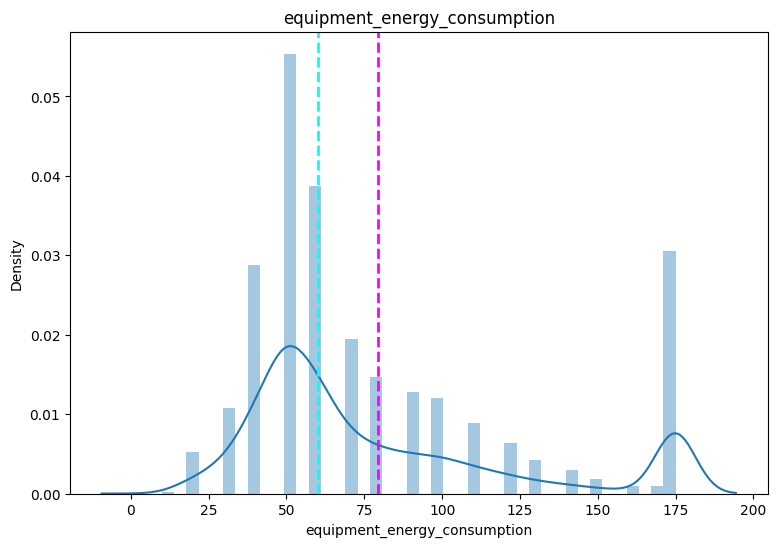

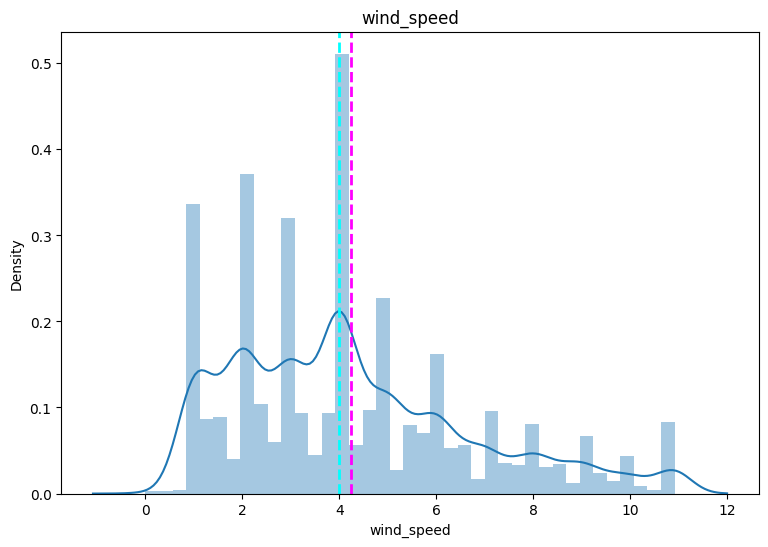

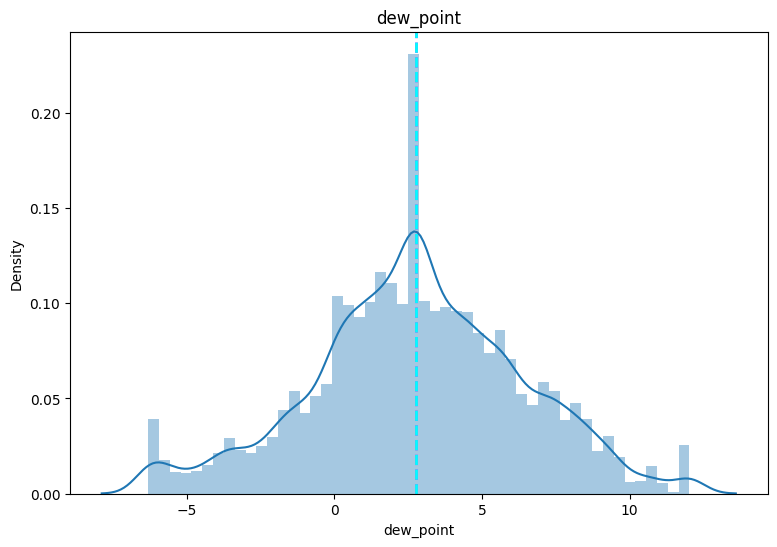

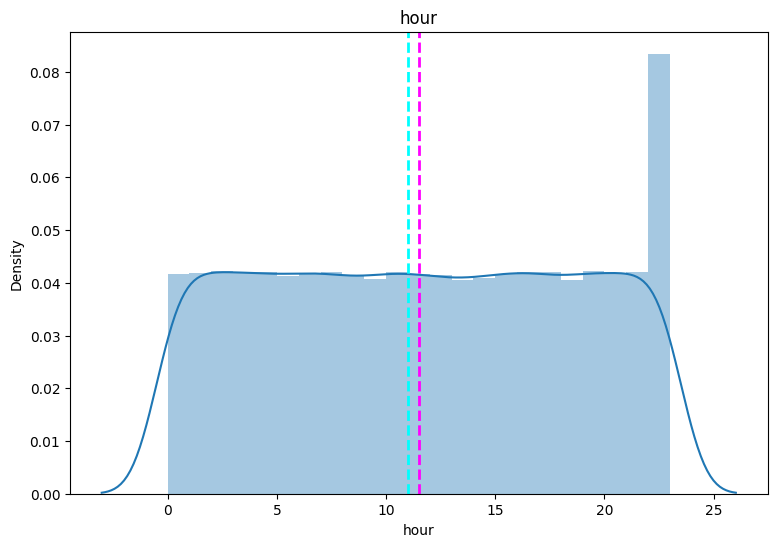

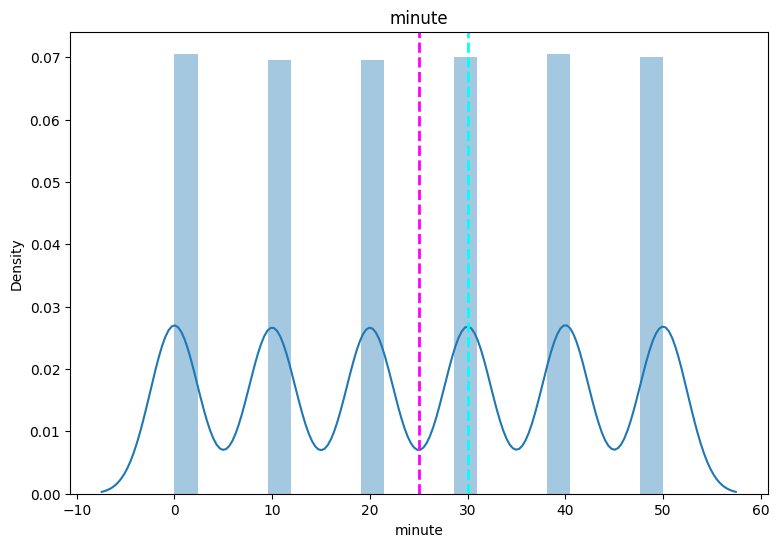

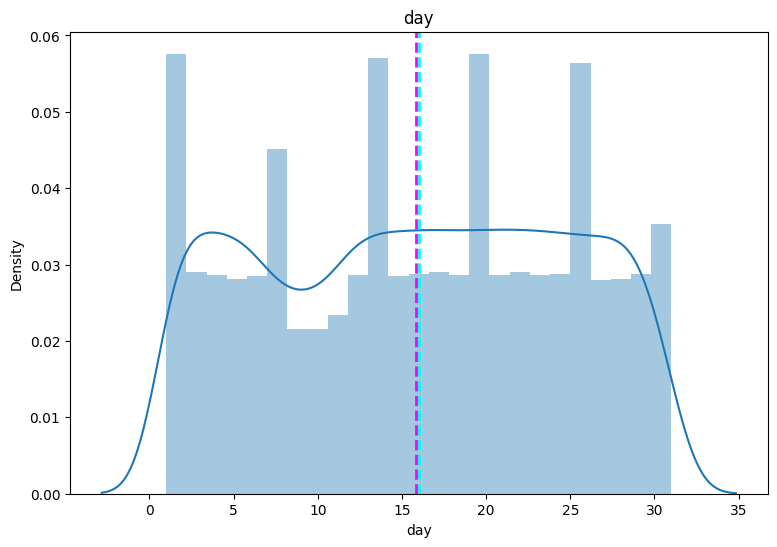

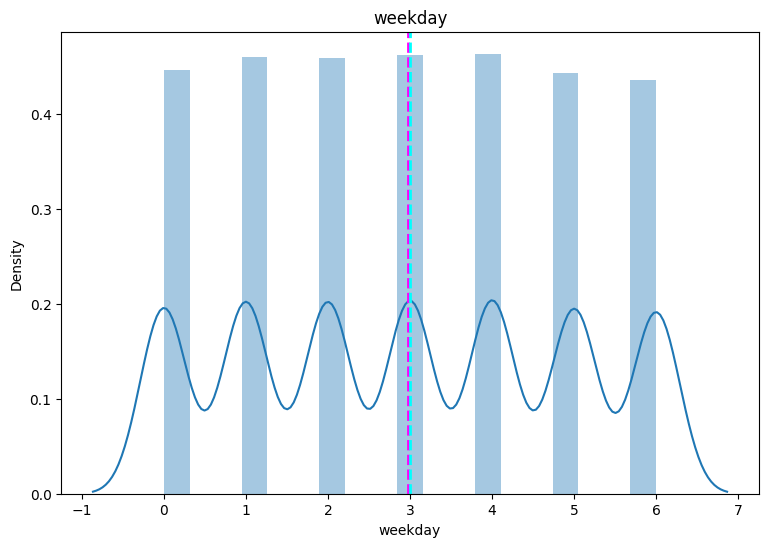

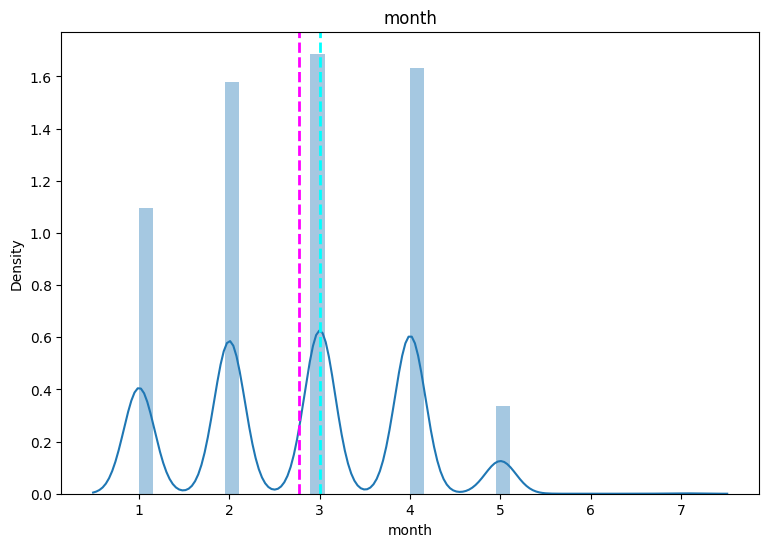

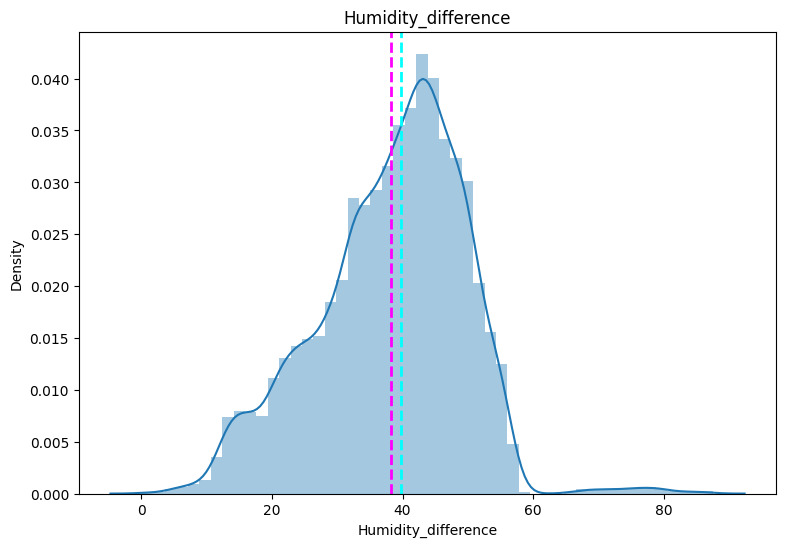

In [35]:
#check distribution  of all independent features
for col in data.describe().columns:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (data[col])
  sns.distplot(data[col])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
plt.show()

In [36]:
# Get only numeric columns
numeric_cols = data.select_dtypes(include=['number'])

# Calculate skewness and filter columns with skewness > 0.5
skewed_cols = numeric_cols.skew().sort_values(ascending=False)
skewed_cols = skewed_cols[(skewed_cols > 0.5) | (skewed_cols <-0.5)]

print(skewed_cols)


equipment_energy_consumption    1.108015
wind_speed                      0.799508
dtype: float64


In [37]:
from scipy.stats import boxcox
from scipy.stats import boxcox_normmax

# Determine the optimal lambda value for the Box-Cox transformation
optimal_lambda = boxcox_normmax(data['equipment_energy_consumption'])

# Apply the Box-Cox transformation to the 'equipment_energy_consumption' column using the optimal lambda
data['equipment_energy_consumption'] = boxcox(data['equipment_energy_consumption'], optimal_lambda)

In [38]:
# Transform Your data
data['wind_speed']=data['wind_speed'].apply(lambda x:np.log10(x+1))
data['Humidity_difference'] = data['Humidity_difference'] ** 2

In [39]:
data.head()

equipment_energy_consumption  wind_speed  dew_point  hour  minute  day  \
0                      2.665312    0.903090      5.300    17       0   11   
1                      2.665312    0.884607      5.200    17      10   11   
2                      2.591878    0.865301      5.100    17      20   11   
3                      2.591878    0.845098     12.025    17      30   11   
4                      2.665312    0.823909      4.900    17      40   11   

   weekday  month  Humidity_difference  
0        0    1.0          1746.620796  
1        0    1.0          1761.546187  
2        0    1.0          1711.568835  
3        0    1.0          1652.826515  
4        0    1.0          1702.968346

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

Yes, I think the equipment_energy_consumption, Humidity_difference, and wind_speed features of the data need to be transformed because they are skewed. We have used log transformation with them. Other features followed normal distribution, symmetrical around the y-axis, and some of them did not have any resemblance to normal distribution. They will be scaled in the upcoming part.

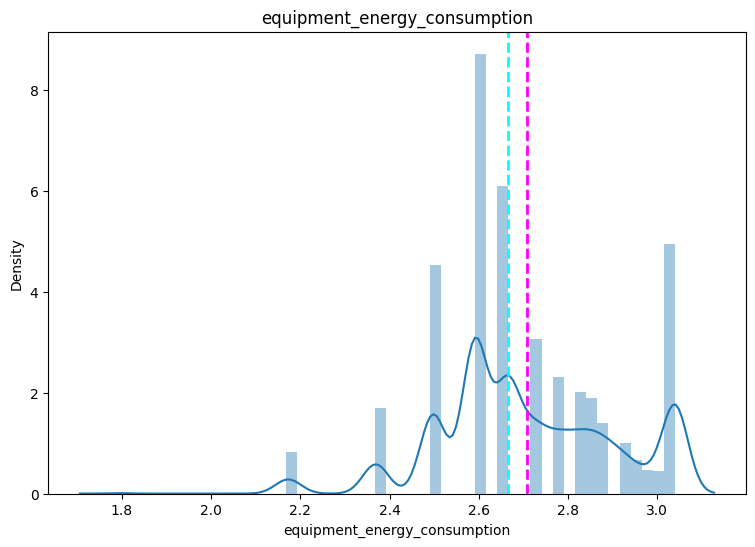

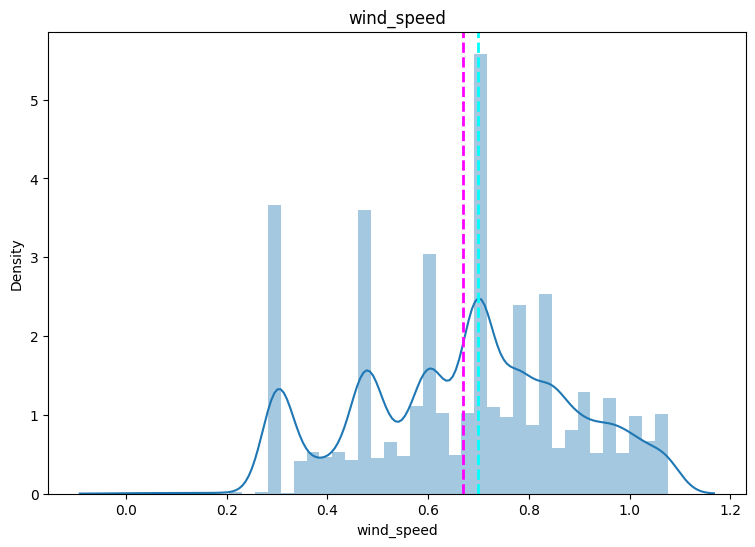

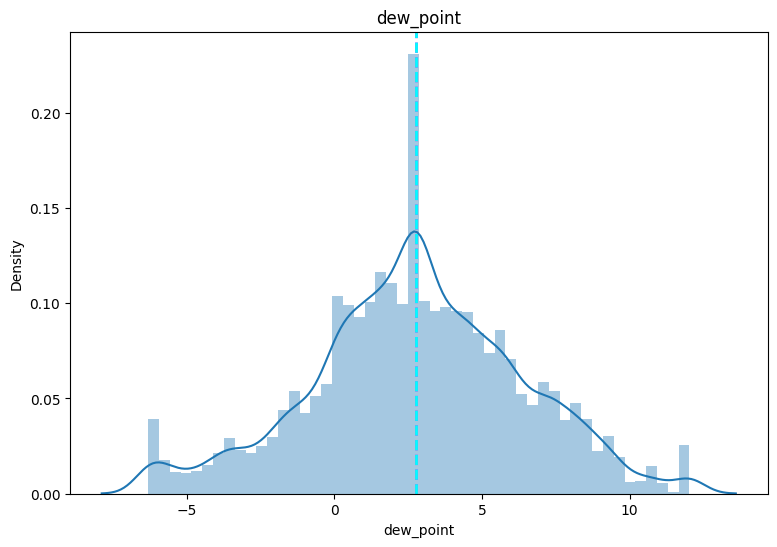

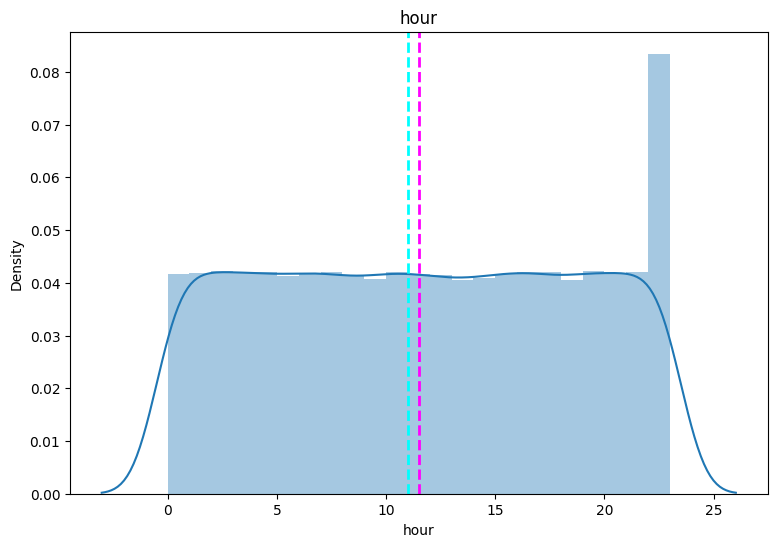

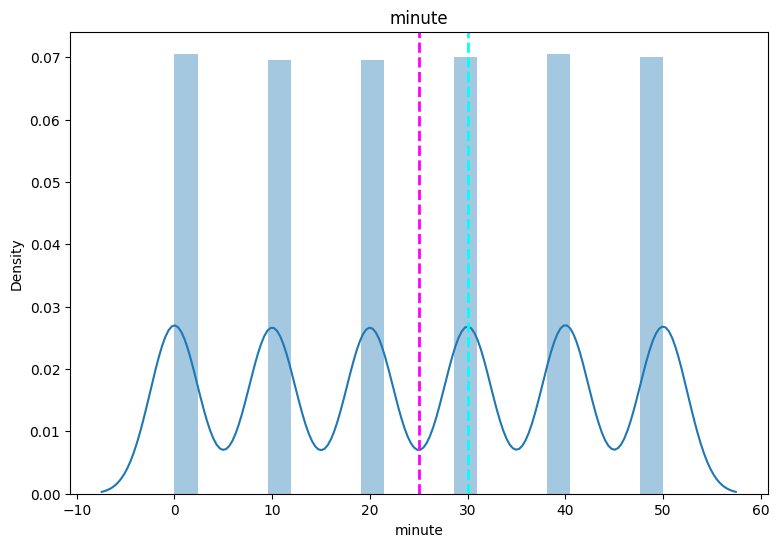

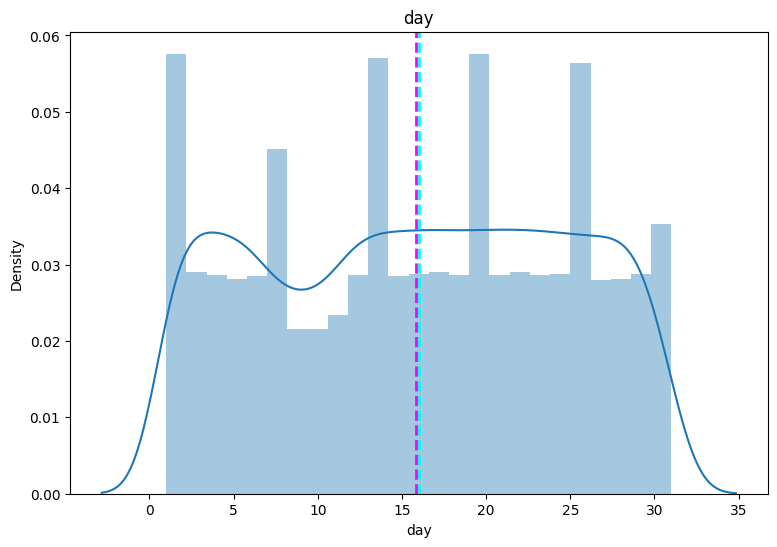

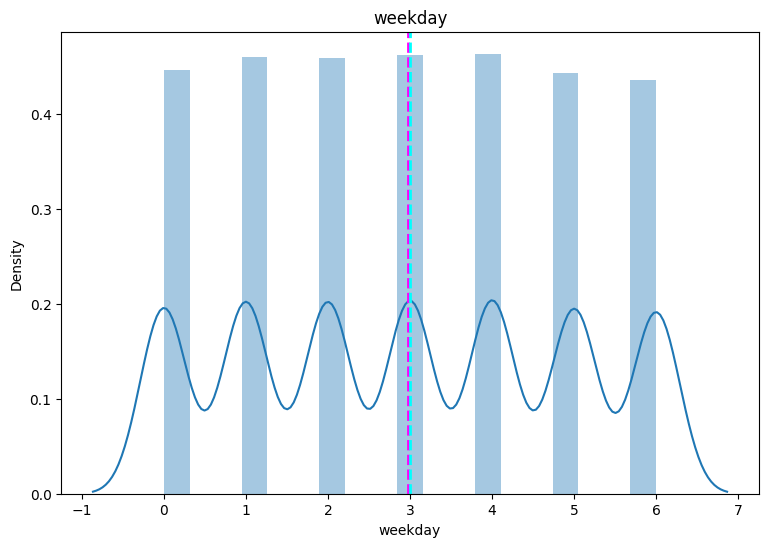

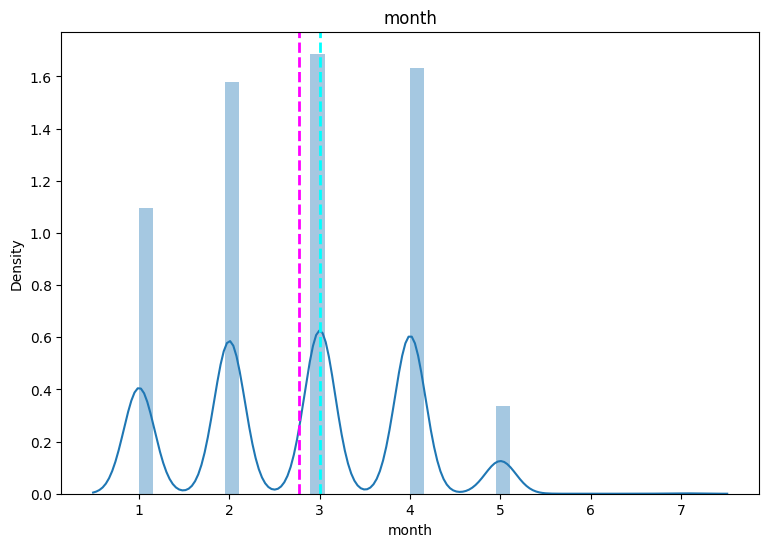

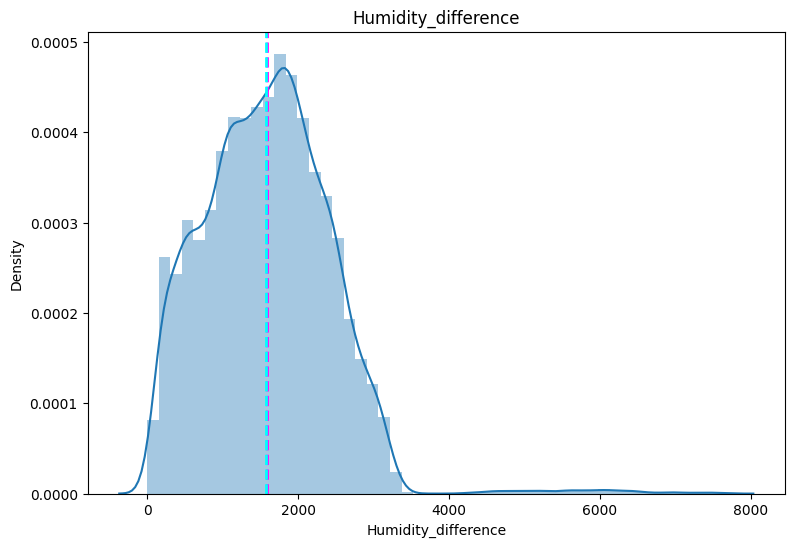

In [40]:
#check distribution  of all independent features
for col in data.describe().columns:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (data[col])
  sns.distplot(data[col])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
plt.show()

### 8. Data Splitting

In [41]:
## Spliting your data to train and test. Choosing Splitting ratio wisely.
X = data.drop(columns=['equipment_energy_consumption'])
y = data['equipment_energy_consumption']
split_idx = int(0.8 * len(data))  # 80% train, 20% test
X_train, y_train = X[:split_idx], y[:split_idx]
X_test, y_test = X[split_idx:], y[split_idx:]

#### What data splitting ratio have you used and why?

The code divides the data into training and testing sets using an 80:20 ratio. This indicates that 80% of the data is utilised to train the model, while 20% is used to test the model.

The ratio is determined by a number of parameters, including the size of the dataset, the complexity of the model, and the amount of computational resources available. In general, a larger training set produces a stronger model, but a smaller testing set produces a higher variance in performance measurements. An 80:20 ratio is an excellent choice since it balances the trade-off between having enough data to train the model and having enough data to evaluate the model's performance.

In [42]:
if isinstance(y_train, np.ndarray):
    y_train = pd.Series(y_train, name='equipment_energy_consumption', index=X_train.index)

# Combine features and target
train = pd.concat([X_train, y_train], axis=1)
if isinstance(y_test, np.ndarray):
    y_test = pd.Series(y_test, name='equipment_energy_consumption', index=X_train.index)

# Combine features and target
test = pd.concat([X_test, y_test], axis=1)

for lag in [1, 2, 3, 4, 5, 6]: 
    train[f'energy_lag_{lag}'] = train['equipment_energy_consumption'].shift(lag)
    test[f'energy_lag_{lag}'] = test['equipment_energy_consumption'].shift(lag)

for i in [3, 6, 12]: 
    train[f'energy_rolling_{i}h_mean'] = train['equipment_energy_consumption'].shift(1).rolling(i).mean()
    test[f'energy_rolling_{i}h_mean'] = test['equipment_energy_consumption'].shift(1).rolling(i).mean()
    
train = train.dropna()
test = test.dropna()
X_train = train.drop(columns='equipment_energy_consumption')
y_train = train['equipment_energy_consumption']
X_test = test.drop(columns='equipment_energy_consumption')
y_test = test['equipment_energy_consumption']

In [43]:
# Scaling your data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Which method have you used to scale you data and why?

The data is scaled using Min-Max scaling or normalisation, which scales the data to a range between 0 and 1.

This approach was chosen because it preserves the distribution of the data and the relationships between the features. Furthermore, many machine learning algorithms perform better with scaled data, particularly those that use distance-based metrics or optimisation functions. Scaling was done with Scikit-learn's MinMaxScaler function.

## Model development and training

In [44]:
#LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)
train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)
print(f"Train: RMSE = {train_rmse:.4f}, R² = {train_r2:.4f}")
print(f"Test : RMSE = {test_rmse:.4f}, R² = {test_r2:.4f}")

Train: RMSE = 0.1226, R² = 0.6456
Test : RMSE = 0.1029, R² = 0.6313


In [45]:
#DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)
preds = model.predict(X_test)
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)
train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)
print(f"Train: RMSE = {train_rmse:.4f}, R² = {train_r2:.4f}")
print(f"Test : RMSE = {test_rmse:.4f}, R² = {test_r2:.4f}")

Train: RMSE = 0.0000, R² = 1.0000
Test : RMSE = 0.1546, R² = 0.1672


In [46]:
#RandomForestRegressor
model = RandomForestRegressor(random_state=5)
model.fit(X_train, y_train)
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)
train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)
print(f"Train: RMSE = {train_rmse:.4f}, R² = {train_r2:.4f}")
print(f"Test : RMSE = {test_rmse:.4f}, R² = {test_r2:.4f}")

Train: RMSE = 0.0440, R² = 0.9545
Test : RMSE = 0.1008, R² = 0.6458


In [47]:
#XGBRegressor
model = XGBRegressor(random_state=42)
model.fit(X_train, y_train)
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)
train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)
print(f"Train: RMSE = {train_rmse:.4f}, R² = {train_r2:.4f}")
print(f"Test : RMSE = {test_rmse:.4f}, R² = {test_r2:.4f}")

Train: RMSE = 0.0740, R² = 0.8711
Test : RMSE = 0.1065, R² = 0.6044


In [54]:
#ExtraTreesRegressor
ETR_model = ExtraTreesRegressor( n_estimators=500,
    max_depth=100,            
    min_samples_split=50,
    random_state=42,
    n_jobs=-1)
ETR_model.fit(X_train, y_train)
train_preds = ETR_model.predict(X_train)
test_preds = ETR_model.predict(X_test)
train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)
print(f"Train: RMSE = {train_rmse:.4f}, R² = {train_r2:.4f}")
print(f"Test : RMSE = {test_rmse:.4f}, R² = {test_r2:.4f}")

Train: RMSE = 0.0981, R² = 0.7732
Test : RMSE = 0.0976, R² = 0.6680


In [55]:
#ExtraTreesRegressor Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
#hyperparameter
h_param= { 'bootstrap': [True, False],
                          'max_depth': [70,100, None],
                          'criterion' :['squared_error'],
                          'max_features': ['log2', 'sqrt'],
                          'n_estimators': [10,1400,100]}

mape_scorer = make_scorer(mean_squared_error, greater_is_better=False)

#grid search cv
grid_search = GridSearchCV(ETR_model, h_param, cv=5, scoring=mape_scorer)
grid_search.fit(X_train, y_train)
print('Best parameters:', grid_search.best_params_)

br_best = grid_search.best_estimator_

# Fit the Algorithm
br_best.fit(X_train, y_train)


#predict on the training model
br_train = br_best.predict(X_train)

# Predict on the model
y_pred = br_best.predict(X_test)
#evaluate the model
mse_br_train=mean_squared_error(y_train,br_train)
mse_br_test = mean_squared_error(y_test, y_pred)
r2_br_train = r2_score(y_train, br_train)
r2_br_test = r2_score(y_test, y_pred)

print(f"Train: RMSE = {mse_br_train:.4f}, R² = {r2_br_train:.4f}")
print(f"Test : RMSE = {mse_br_test:.4f}, R² = {r2_br_test:.4f}")

Best parameters: {'bootstrap': False, 'criterion': 'squared_error', 'max_depth': 70, 'max_features': 'log2', 'n_estimators': 1400}
Train: RMSE = 0.0114, R² = 0.7324
Test : RMSE = 0.0099, R² = 0.6541


In [58]:
filename = 'finalized_model.sav'
pickle.dump(ETR_model, open(filename, 'wb'))

## Results and Insights 

* The ExtraTreeRegressor model was chosen as the final model, which is an ensemble learning method that mixes numerous decision trees to improve forecast accuracy and prevent overfitting. It works by training a large number of decision trees and then outputs the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees.
  
* Because this dataset involves a temporal component, we believe that employing temporal Series Analysis techniques will result in superior results.

* ExtraTreeRegressor was discovered to be the best performing model, with an R-squared value of 0.6680.

* wind_speed, dew_point, hour, minute, day, weekday, month, Humidity_difference  all play a part in energy prediction.e.